In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Problem Statement

In the covid-19 pandemic period. e-commerce market is playing an important role in Global Economy. E-commerce has change the trends of purchasing methods in the community and supported the community in supplying their necessities without going outdoors and face-to-face.
 
It has become one of the most convenient way for people to purchase items conveniently and efficiently. Therefore, a churn from every customer is vital for every E-commerce company. Every churn will be a big loss to a company and because of that, when the numbers of churn customer is increasing, the company might undergo loss in their daily revenue, to be severe,they might go bankruptcy too. 
 
Due to that, we have try to solve this problem by using machine learning algorithm to create a program that helps to predict the customer that might churn on their e-commerce experience which could reduce the churn rate to prevent further losses in the future.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from yellowbrick.model_selection import LearningCurve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.pyplot import figure


In [ ]:
# data = pd.read_csv("/content/drive/Shareddrives/BMCS 2114 Machine Learning /E_Comm_Dataset.csv")
data = pd.read_csv("E_Comm_Dataset.csv")
data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [ ]:
data = data.drop(columns=["CustomerID"])
data.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     NaN                Phone         1              8.0   
2      1     NaN                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

# **Exploratory Data Analysis**

In [ ]:
data.describe().T

count        mean        std   min    25%  \
Churn                        5630.0    0.168384   0.374240   0.0    0.0   
Tenure                       5366.0   10.189899   8.557241   0.0    2.0   
CityTier                     5630.0    1.654707   0.915389   1.0    1.0   
WarehouseToHome              5379.0   15.639896   8.531475   5.0    9.0   
HourSpendOnApp               5375.0    2.931535   0.721926   0.0    2.0   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.0   
SatisfactionScore            5630.0    3.066785   1.380194   1.0    2.0   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.0   
Complain                     5630.0    0.284902   0.451408   0.0    0.0   
OrderAmountHikeFromlastYear  5365.0   15.707922   3.675485  11.0   13.0   
CouponUsed                   5374.0    1.751023   1.894621   0.0    1.0   
OrderCount                   5372.0    3.008004   2.939680   1.0    1.0   
DaySinceLastOrder            5323.0    4.543491   3.654433   0.0    2.0   
CashbackAmount               5630.0  177.221492  49.193869   0.0  146.0   

                               50%    75%    max  
Churn                          0.0    0.0    1.0  
Tenure                         9.0   16.0   61.0  
CityTier                       1.0    3.0    3.0  
WarehouseToHome               14.0   20.0  127.0  
HourSpendOnApp                 3.0    3.0    5.0  
NumberOfDeviceRegistered       4.0    4.0    6.0  
SatisfactionScore              3.0    4.0    5.0  
NumberOfAddress                3.0    6.0   22.0  
Complain                       0.0    1.0    1.0  
OrderAmountHikeFromlastYear   15.0   18.0   26.0  
CouponUsed                     1.0    2.0   16.0  
OrderCount                     2.0    3.0   16.0  
DaySinceLastOrder              3.0    7.0   46.0  
CashbackAmount               163.0  196.0  325.0

In [ ]:
data.shape

(5630, 19)

In [ ]:
data['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [ ]:
data.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [ ]:
X = data.drop(['Churn'], axis =1)
y = data['Churn']
X

Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0        4.0         Mobile Phone         3              6.0   
1        NaN                Phone         1              8.0   
2        NaN                Phone         1             30.0   
3        0.0                Phone         3             15.0   
4        0.0                Phone         1             12.0   
...      ...                  ...       ...              ...   
5625    10.0             Computer         1             30.0   
5626    13.0         Mobile Phone         1             13.0   
5627     1.0         Mobile Phone         1             11.0   
5628    23.0             Computer         3              9.0   
5629     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4                      CC    Male             NaN                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1                 Mobile                  3        Single                7   
2                 Mobile                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4                 Mobile                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0            1                         11.0         1.0         1.0   
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
...        ...                          ...         ...         ...   
5625         0                         18.0         1.0         2.0   
5626         0                         16.0         1.0         2.0   
5627         1                         21.0         1.0         2.0   
5628         0                         15.0         2.0         2.0   
5629         0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
0                   5.0             160  
1                   0.0             121  
2                   3.0             120  
3                   3.0             134  
4                   3.0             130  
...                 ...             ...  
5625                4.0             151  
5626                NaN             225  
5627                4.0             186  
5628                9.0             179  
5629                3.0             

In [ ]:
# **Exploratory Data Analysis**graph_df = data.copy();
graph_df.Churn = graph_df.Churn.replace([0,1], ["No","Yes"])

# **Exploratory Data Analysis**

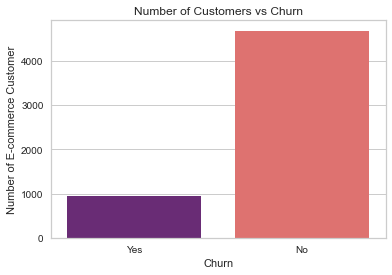

In [ ]:
ax = plt.axes()

sns.countplot(data = graph_df, x = "Churn", palette="magma")

ax.set(xlabel='Churn',
       ylabel='Number of E-commerce Customer',
       title='Number of Customers vs Churn');

In [ ]:
graph_categorical_col = ["PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus", "CityTier", "SatisfactionScore","Complain"]
graph_categorical_data = data[graph_categorical_col]

categorical_cols = ["PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus", "Complain"]
categorical_data = data[categorical_cols]

In [ ]:
graph_numerical_cols = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "NumberOfAddress",  
                  "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]
graph_numerical_data = data[graph_numerical_cols]

numerical_cols = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "NumberOfAddress", "CityTier", "SatisfactionScore", 
                  "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]
numerical_data = data[numerical_cols]

In [ ]:
def plot_categorical(dataset, hue, cols):
  
  fig, axes = plt.subplots(4, 2, figsize= (16,16), sharey='col')

  fig.subplots_adjust(hspace=.5)
  index = 0 
  for i in range(4):
      for j in range(2):
      
          sns.countplot(data = dataset, x = str(cols[index]) , hue = hue, ax = axes[i,j], palette="icefire_r")
          axes[i,j].grid(True)
          if(index < cols.size - 1 ):
            index +=1
  
  plt.show()

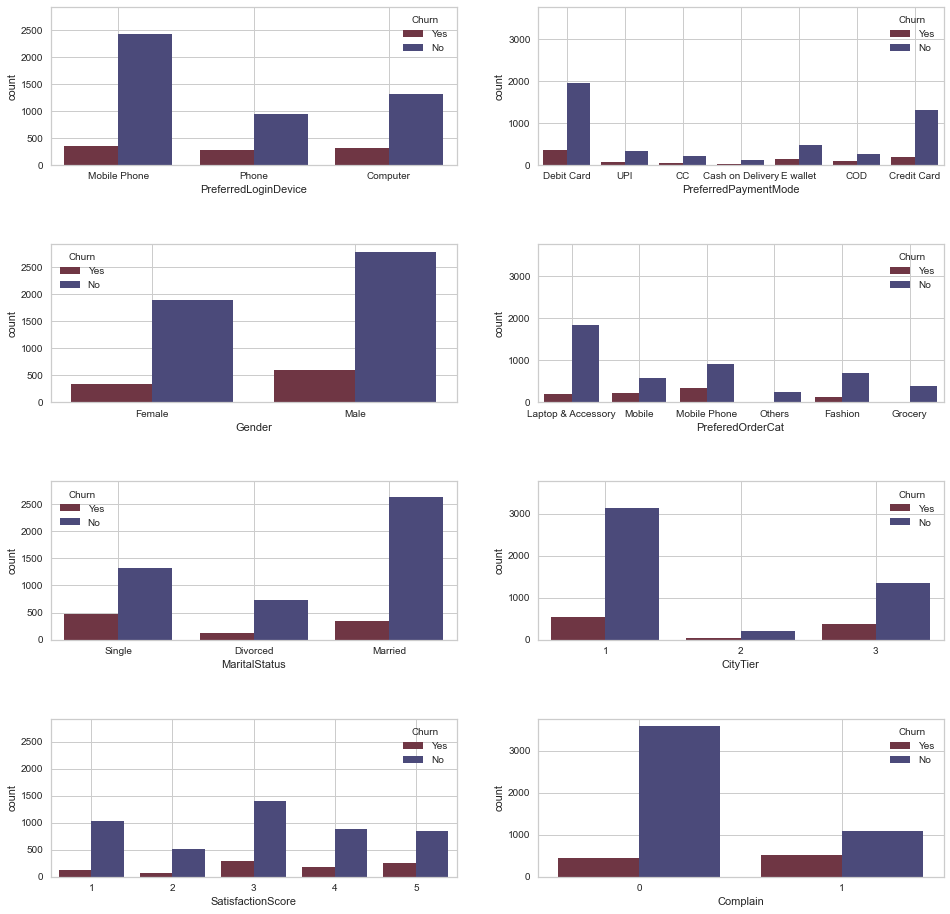

In [ ]:
plot_categorical(graph_df,"Churn", graph_categorical_data.columns)

In [ ]:
def plot_box_numerical(dataset, hue, cols):

  fig, axes = plt.subplots(5, 2, figsize= (16,16), sharey='col')
  sns.set_context("talk")
  sns.set_palette("dark")
  fig.subplots_adjust(hspace=.5)
  index = 0 
  for i in range(5):
    for j in range(2):
      
      sns.boxplot(data = dataset, x = str(cols[index]) , hue = hue, ax = axes[i,j], color="teal")
      axes[i,j].grid(True)
      if(index < cols.size - 1 ):
        index +=1
  

  plt.show()

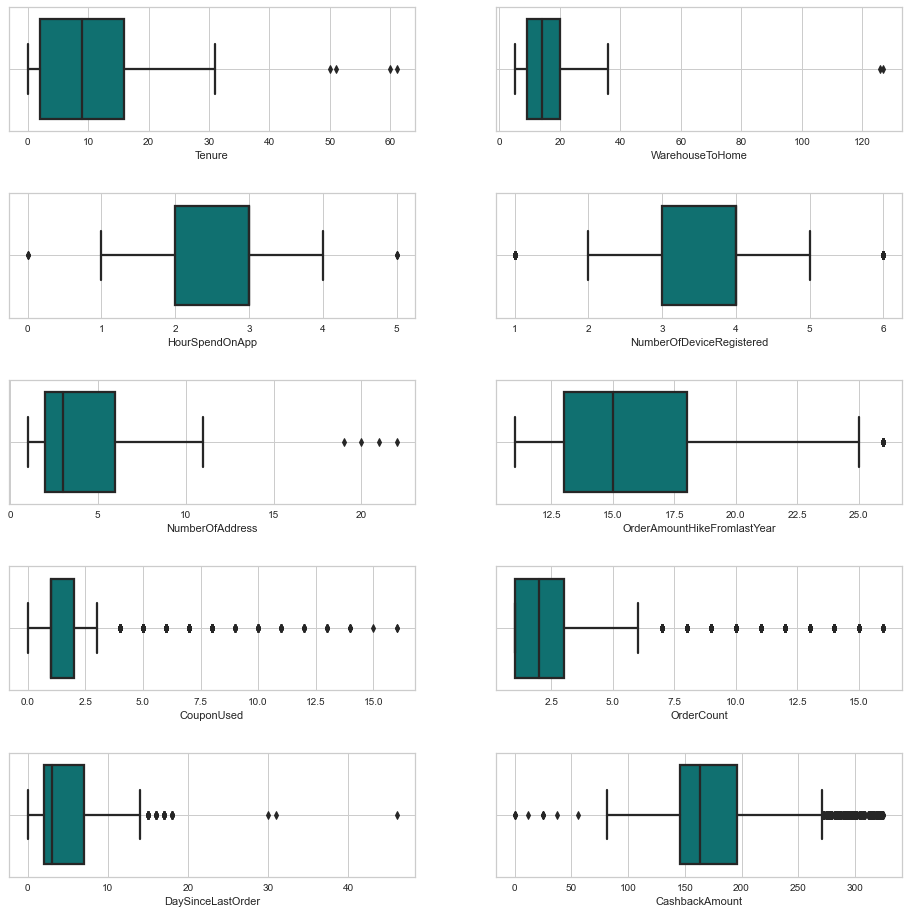

In [ ]:
plot_box_numerical(graph_df, "Churn", graph_numerical_data.columns)

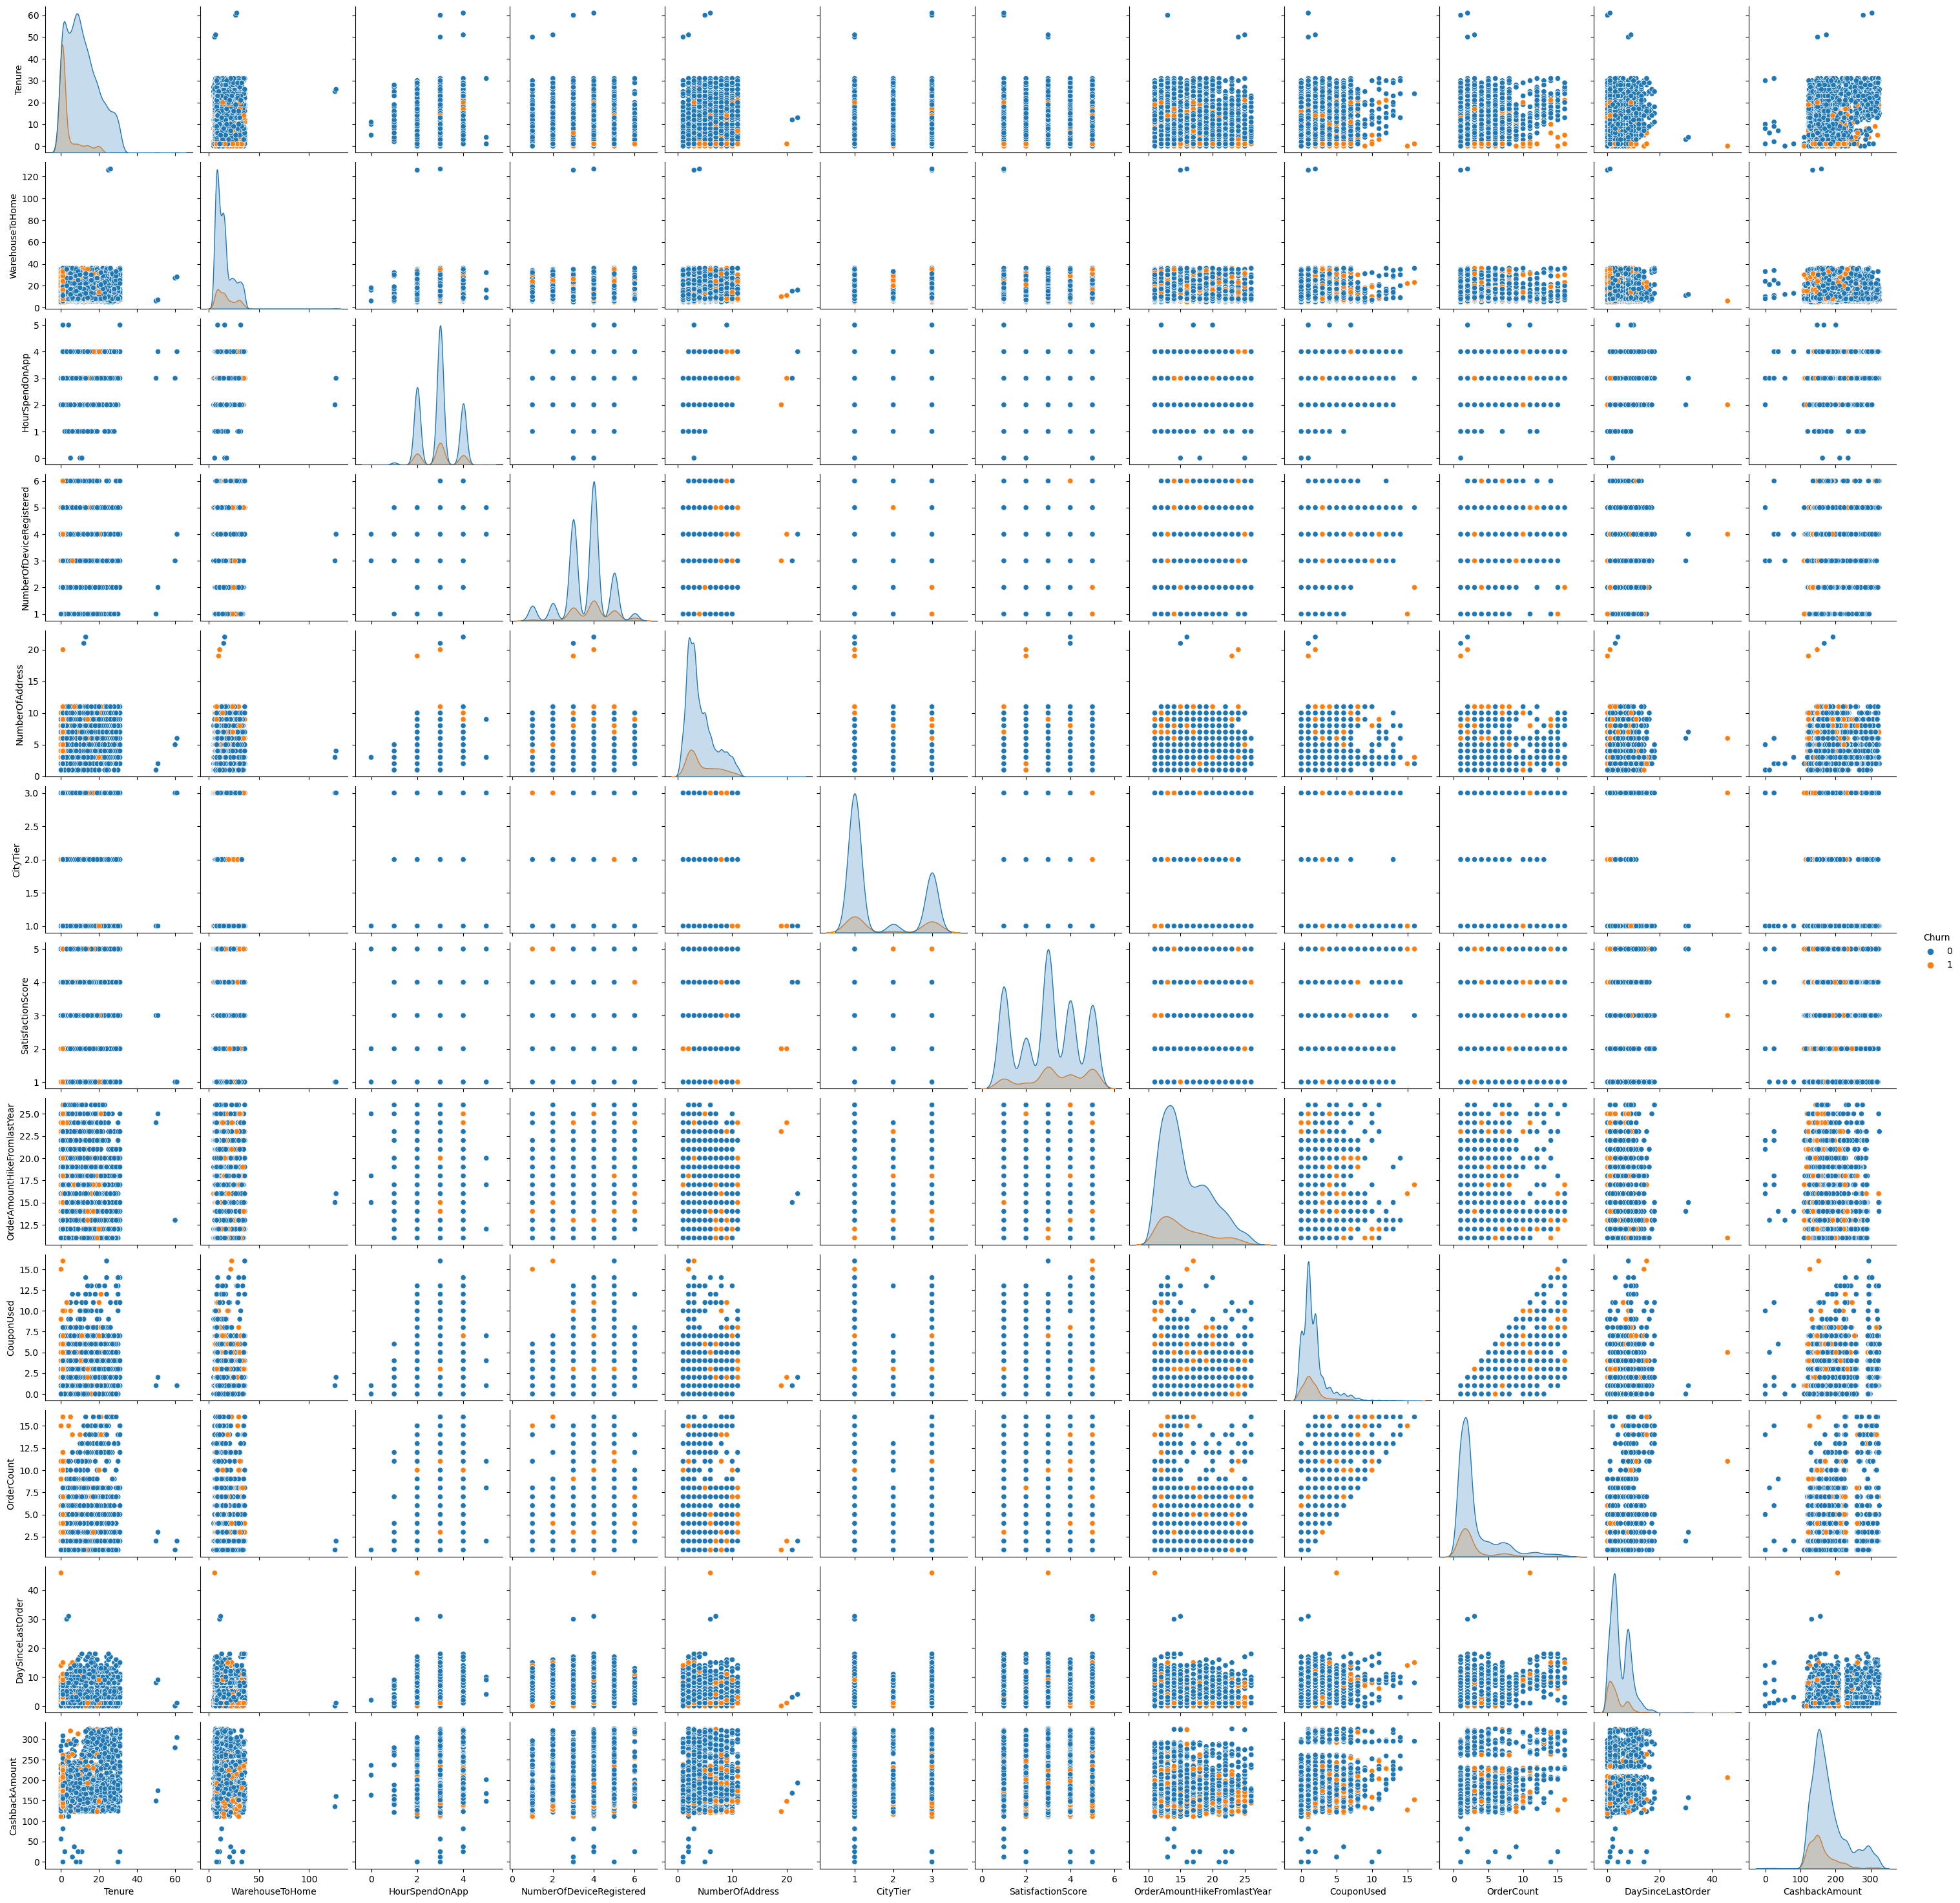

In [ ]:

matplotlib.rc_file_defaults() # to reset seaborn plotting style
sns.pairplot(data, vars = numerical_data.columns, hue = "Churn", diag_kind = 'kde', height=2.5, aspect=1)

# **Preprocessing**

Based on the pairplot above, we can observe that some of the numerical data columns are skewed. The log transform can be applied to solve the skewness of the data.

In [ ]:
numerical_data

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0        4.0              6.0             3.0                         3   
1        NaN              8.0             3.0                         4   
2        NaN             30.0             2.0                         4   
3        0.0             15.0             2.0                         4   
4        0.0             12.0             NaN                         3   
...      ...              ...             ...                       ...   
5625    10.0             30.0             3.0                         2   
5626    13.0             13.0             3.0                         5   
5627     1.0             11.0             3.0                         2   
5628    23.0              9.0             4.0                         5   
5629     8.0             15.0             3.0                         2   

      NumberOfAddress  CityTier  SatisfactionScore  \
0                   9         3                  2   
1                   7         1                  3   
2                   6         1                  3   
3                   8         3                  5   
4                   3         1                  5   
...               ...       ...                ...   
5625                6         1                  1   
5626                6         1                  5   
5627                3         1                  4   
5628                4         3                  4   
5629                4         1                  3   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                            11.0         1.0         1.0                5.0   
1                            15.0         0.0         1.0                0.0   
2                            14.0         0.0         1.0                3.0   
3                            23.0         0.0         1.0                3.0   
4                            11.0         1.0         1.0                3.0   
...                           ...         ...         ...                ...   
5625                         18.0         1.0         2.0                4.0   
5626                         16.0         1.0         2.0                NaN   
5627                         21.0         1.0         2.0                4.0   
5628                         15.0         2.0         2.0                9.0   
5629                         13.0         2.0         2.0                3.0   

      CashbackAmount  
0                160  
1                121  
2                120  
3                134  
4                130  
...              ...  
5625             151  
5626             225  
5627             186  
5628             179  
5629             169  

[5630 rows x 12 columns]

In [ ]:
numerical_data.dtypes

Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
NumberOfAddress                  int64
CityTier                         int64
SatisfactionScore                int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

Based on the output above, the data types of numerical data in this dataset are integer and float. To allow the data store in decimal, the data types have to be changed to float.

In [ ]:
conv_float = ['NumberOfDeviceRegistered', 'NumberOfAddress', 'CashbackAmount', 'CityTier', 'SatisfactionScore']
numerical_data[conv_float] = numerical_data[conv_float].astype(float)
numerical_data.describe()

C:\Users\tkyua\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  5366.000000      5379.000000     5375.000000               5630.000000   
mean     10.189899        15.639896        2.931535                  3.688988   
std       8.557241         8.531475        0.721926                  1.023999   
min       0.000000         5.000000        0.000000                  1.000000   
25%       2.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      16.000000        20.000000        3.000000                  4.000000   
max      61.000000       127.000000        5.000000                  6.000000   

       NumberOfAddress     CityTier  SatisfactionScore  \
count      5630.000000  5630.000000        5630.000000   
mean          4.214032     1.654707           3.066785   
std           2.583586     0.915389           1.380194   
min           1.000000     1.000000           1.000000   
25%           2.000000     1.000000           2.000000   
50%           3.000000     1.000000           3.000000   
75%           6.000000     3.000000           4.000000   
max          22.000000     3.000000           5.000000   

       OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count                  5365.000000  5374.000000  5372.000000   
mean                     15.707922     1.751023     3.008004   
std                       3.675485     1.894621     2.939680   
min                      11.000000     0.000000     1.000000   
25%                      13.000000     1.000000     1.000000   
50%                      15.000000     1.000000     2.000000   
75%                      18.000000     2.000000     3.000000   
max                      26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        5323.000000     5630.000000  
mean            4.543491      177.221492  
std             3.654433       49.193869  
min             0.000000        0.000000  
25%             2.000000      146.000000  
50%             3.000000      163.000000  
75%             7.000000      196.000000  
max            46.000000      325.000000

Before performing log transform onto the numerical columns data, the data with value zero have to be replaced with one to prevent error during transformation.

In [ ]:
add_one_col = ['Tenure','HourSpendOnApp','CouponUsed','DaySinceLastOrder','CashbackAmount']
numerical_data[add_one_col] = numerical_data[add_one_col].replace(0,1)
numerical_data.describe()

C:\Users\tkyua\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  5366.000000      5379.000000     5375.000000               5630.000000   
mean     10.284570        15.639896        2.932093                  3.688988   
std       8.448809         8.531475        0.720043                  1.023999   
min       1.000000         5.000000        1.000000                  1.000000   
25%       2.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      16.000000        20.000000        3.000000                  4.000000   
max      61.000000       127.000000        5.000000                  6.000000   

       NumberOfAddress     CityTier  SatisfactionScore  \
count      5630.000000  5630.000000        5630.000000   
mean          4.214032     1.654707           3.066785   
std           2.583586     0.915389           1.380194   
min           1.000000     1.000000           1.000000   
25%           2.000000     1.000000           2.000000   
50%           3.000000     1.000000           3.000000   
75%           6.000000     3.000000           4.000000   
max          22.000000     3.000000           5.000000   

       OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count                  5365.000000  5374.000000  5372.000000   
mean                     15.707922     1.942687     3.008004   
std                       3.675485     1.753057     2.939680   
min                      11.000000     1.000000     1.000000   
25%                      13.000000     1.000000     1.000000   
50%                      15.000000     1.000000     2.000000   
75%                      18.000000     2.000000     3.000000   
max                      26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        5323.000000     5630.000000  
mean            4.636671      177.222202  
std             3.548592       49.191316  
min             1.000000        1.000000  
25%             2.000000      146.000000  
50%             3.000000      163.000000  
75%             7.000000      196.000000  
max            46.000000      325.000000

In [ ]:
corr_mat = numerical_data.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

Tenure  WarehouseToHome  HourSpendOnApp  \
Tenure                       0.000000        -0.018260       -0.029116   
WarehouseToHome             -0.018260         0.000000        0.060935   
HourSpendOnApp              -0.029116         0.060935        0.000000   
NumberOfDeviceRegistered    -0.029524         0.019071        0.317335   
NumberOfAddress              0.235837        -0.011020        0.145123   
CityTier                    -0.060541         0.010624       -0.009734   
SatisfactionScore           -0.013105         0.007722        0.031715   
OrderAmountHikeFromlastYear  0.004691         0.038795        0.107933   
CouponUsed                   0.125080        -0.008468        0.129979   
OrderCount                   0.184094         0.002681        0.109398   
DaySinceLastOrder            0.183202         0.017714        0.063185   
CashbackAmount               0.474079        -0.009531        0.122159   

                             NumberOfDeviceRegistered  NumberOfAddress  \
Tenure                                      -0.029524         0.235837   
WarehouseToHome                              0.019071        -0.011020   
HourSpendOnApp                               0.317335         0.145123   
NumberOfDeviceRegistered                     0.000000         0.084997   
NumberOfAddress                              0.084997         0.000000   
CityTier                                     0.027934        -0.029440   
SatisfactionScore                           -0.017228         0.053583   
OrderAmountHikeFromlastYear                  0.069475         0.015533   
CouponUsed                                   0.108377         0.020546   
OrderCount                                   0.103464        -0.007609   
DaySinceLastOrder                            0.010604        -0.068856   
CashbackAmount                               0.137401         0.186805   

                             CityTier  SatisfactionScore  \
Tenure                      -0.060541          -0.013105   
WarehouseToHome              0.010624           0.007722   
HourSpendOnApp              -0.009734           0.031715   
NumberOfDeviceRegistered     0.027934          -0.017228   
NumberOfAddress             -0.029440           0.053583   
CityTier                     0.000000          -0.011554   
SatisfactionScore           -0.011554           0.000000   
OrderAmountHikeFromlastYear -0.031408          -0.027730   
CouponUsed                   0.021859           0.017030   
OrderCount                   0.033388           0.019764   
DaySinceLastOrder            0.019016           0.033739   
CashbackAmount               0.055715           0.003439   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Tenure                                          0.004691    0.125080   
WarehouseToHome                                 0.038795   -0.008468   
HourSpendOnApp                                  0.107933    0.129979   
NumberOfDeviceRegistered                        0.069475    0.108377   
NumberOfAddress                                 0.015533    0.020546   
CityTier                                       -0.031408    0.021859   
SatisfactionScore                              -0.027730    0.017030   
OrderAmountHikeFromlastYear                     0.000000    0.017776   
CouponUsed                                      0.017776    0.000000   
OrderCount                                      0.023101    0.747854   
DaySinceLastOrder                               0.005440    0.355666   
CashbackAmount                                  0.017979    0.264127   

                             OrderCount  DaySinceLastOrder  CashbackAmount  
Tenure                         0.184094           0.183202        0.474079  
WarehouseToHome                0.002681           0.017714       -0.009531  
HourSpendOnApp                 0.109398           0.063185        0.122159  
NumberOfDeviceRegistered       0.103464           0.010604        0.137401  
Nu

<AxesSubplot:>

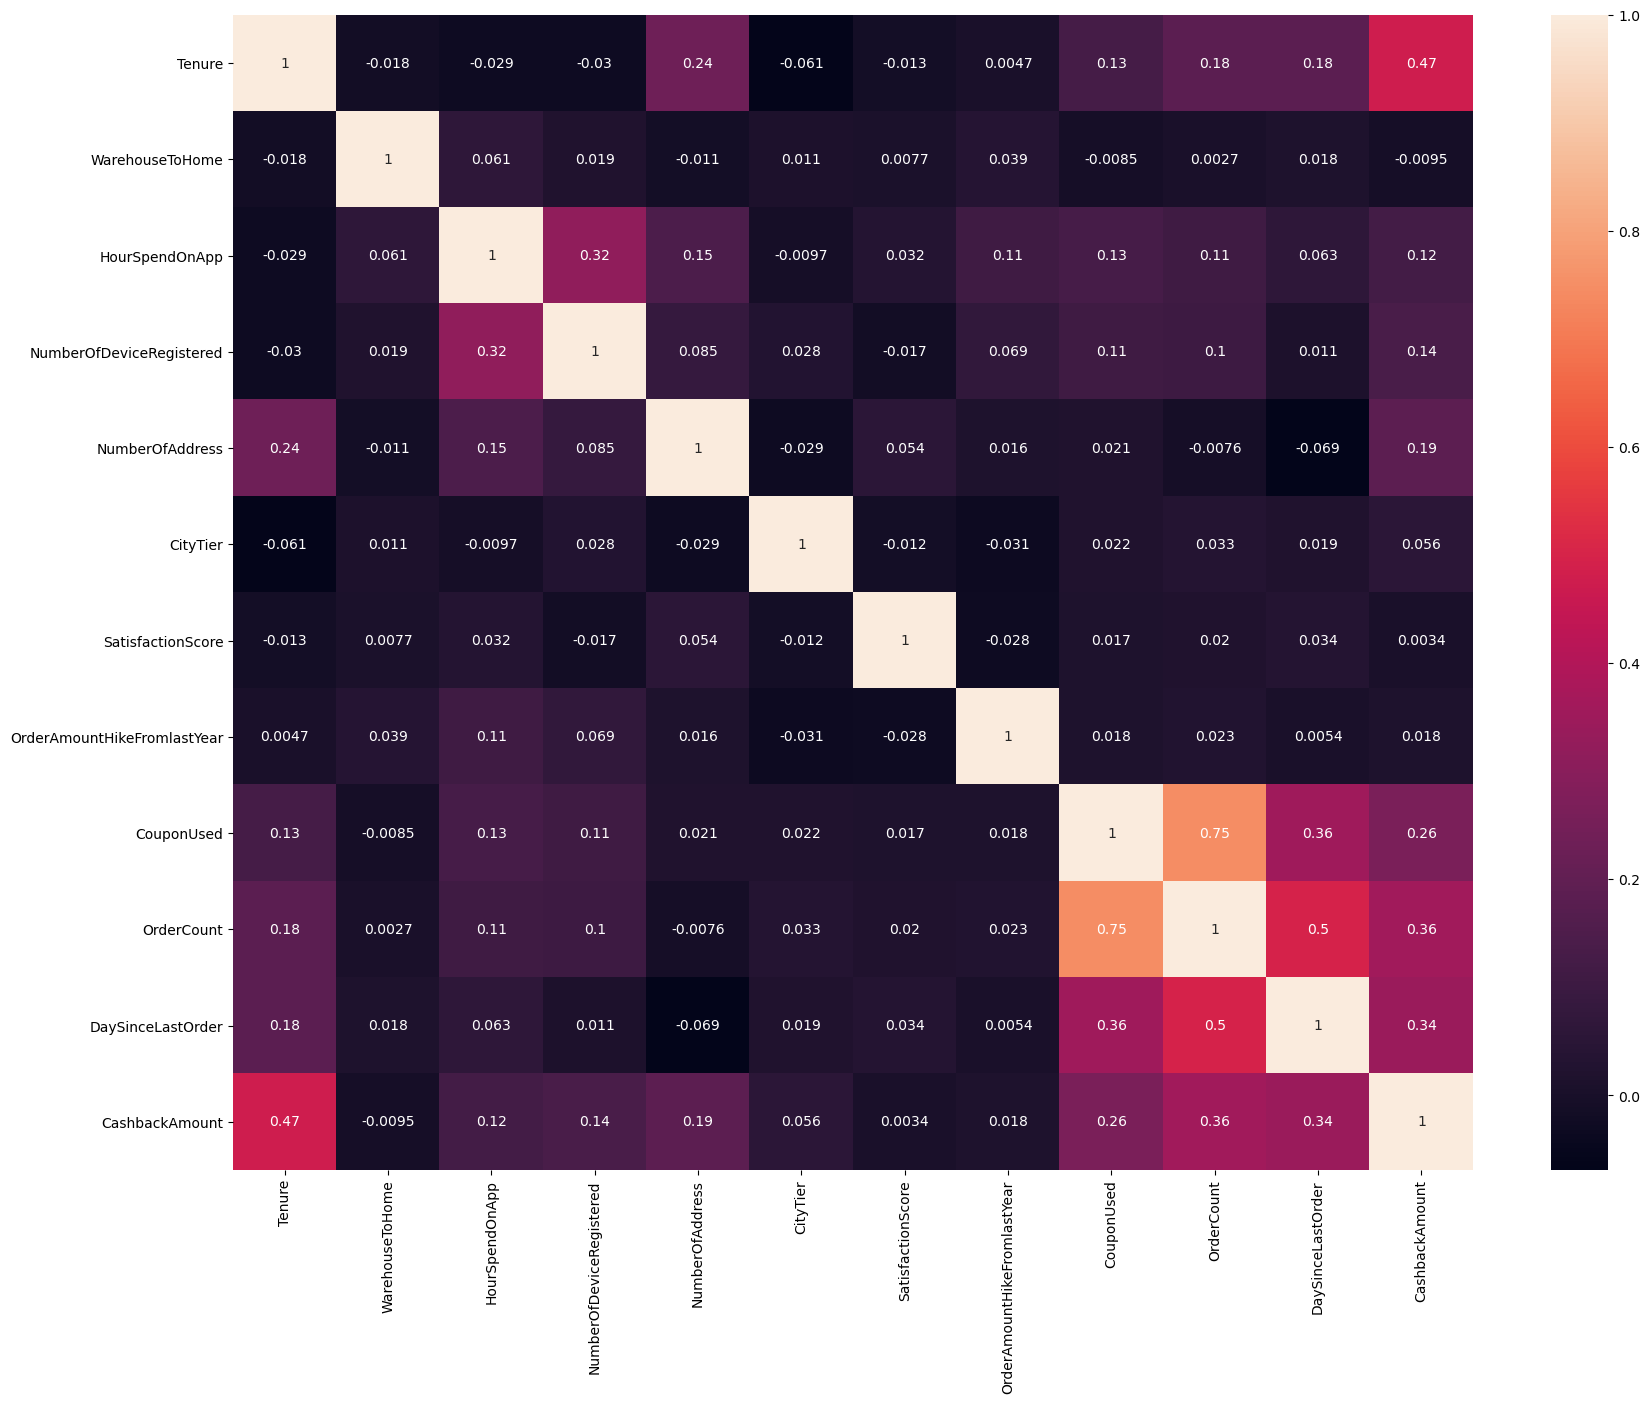

In [ ]:
correlation = numerical_data.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlation, annot= True)

Based on the correlation map, we can easily observe the relationships among the numerical features in the dataset. If there exist the two features with high relationships, we can remove either one to reduce the complexity.

In [ ]:
def preprocess_df():
  df_eda = numerical_data
  df_eda.fillna(df_eda.mean(), inplace = True)
  print(df_eda.isnull().sum()) 
  print (corr_mat.abs().idxmax())
  log_columns = numerical_data.skew().sort_values(ascending=False)
  log_columns = log_columns.loc[log_columns > 0.75]
  print(log_columns)
  for col in log_columns.index:
    df_eda[col] = np.log1p(df_eda[col])
  df_eda = StandardScaler().fit_transform(df_eda)
  return df_eda

In [ ]:
df_eda = preprocess_df()

Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
NumberOfAddress                0
CityTier                       0
SatisfactionScore              0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64
Tenure                                   CashbackAmount
WarehouseToHome                          HourSpendOnApp
HourSpendOnApp                 NumberOfDeviceRegistered
NumberOfDeviceRegistered                 HourSpendOnApp
NumberOfAddress                                  Tenure
CityTier                                         Tenure
SatisfactionScore                       NumberOfAddress
OrderAmountHikeFromlastYear              HourSpendOnApp
CouponUsed                                   OrderCount
OrderCount                                   CouponUsed
DaySinceLastOrder              

C:\Users\tkyua\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-52-20dcf4f06ac2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda[col] = np.log1p(df_eda[col])


In [ ]:
y = pd.DataFrame(y, columns=['Churn'])
df_eda = pd.DataFrame(df_eda, columns = numerical_data.columns)
df_eda

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0    -0.531238        -1.613206        0.096530                 -0.672900   
1     0.376661        -1.075437        0.096530                  0.303750   
2     0.376661         1.571022       -1.324971                  0.303750   
3    -1.553229         0.155743       -1.324971                  0.303750   
4    -1.553229        -0.288569        0.000000                 -0.672900   
...        ...              ...             ...                       ...   
5625  0.348174         1.571022        0.096530                 -1.649551   
5626  0.617156        -0.129991        0.096530                  1.280401   
5627 -1.553229        -0.459847        0.096530                 -1.649551   
5628  1.218329        -0.849983        1.518030                  1.280401   
5629  0.124354         0.155743        0.096530                 -1.649551   

      NumberOfAddress  CityTier  SatisfactionScore  \
0            1.627757  1.469771          -0.772992   
1            1.152085 -0.715286          -0.048392   
2            0.867438 -0.715286          -0.048392   
3            1.403162  1.469771           1.400807   
4           -0.325487 -0.715286           1.400807   
...               ...       ...                ...   
5625         0.867438 -0.715286          -1.497592   
5626         0.867438 -0.715286           1.400807   
5627        -0.325487 -0.715286           0.676207   
5628         0.150185  1.469771           0.676207   
5629         0.150185 -0.715286          -0.048392   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                       -1.509945   -0.707578   -0.988757           0.400581   
1                       -0.105893   -0.707578   -0.988757          -1.421779   
2                       -0.420878   -0.707578   -0.988757          -0.271998   
3                        1.873007   -0.707578   -0.988757          -0.271998   
4                       -1.509945   -0.707578   -0.988757          -0.271998   
...                           ...         ...         ...                ...   
5625                     0.732834   -0.707578   -0.226639           0.098149   
5626                     0.189990   -0.707578   -0.226639           0.296964   
5627                     1.448342   -0.707578   -0.226639           0.098149   
5628                    -0.105893    0.298832   -0.226639           1.247930   
5629                    -0.757602    0.298832   -0.226639          -0.271998   

      CashbackAmount  
0          -0.231002  
1          -1.212343  
2          -1.241461  
3          -0.854122  
4          -0.960532  
...              ...  
5625       -0.434513  
5626        0.968791  
5627        0.298629  
5628        0.163654  
5629       -0.038564  

[5630 rows x 12 columns]

In [ ]:
df_eda = pd.concat([df_eda, y], axis = 1)
df_eda

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0    -0.531238        -1.613206        0.096530                 -0.672900   
1     0.376661        -1.075437        0.096530                  0.303750   
2     0.376661         1.571022       -1.324971                  0.303750   
3    -1.553229         0.155743       -1.324971                  0.303750   
4    -1.553229        -0.288569        0.000000                 -0.672900   
...        ...              ...             ...                       ...   
5625  0.348174         1.571022        0.096530                 -1.649551   
5626  0.617156        -0.129991        0.096530                  1.280401   
5627 -1.553229        -0.459847        0.096530                 -1.649551   
5628  1.218329        -0.849983        1.518030                  1.280401   
5629  0.124354         0.155743        0.096530                 -1.649551   

      NumberOfAddress  CityTier  SatisfactionScore  \
0            1.627757  1.469771          -0.772992   
1            1.152085 -0.715286          -0.048392   
2            0.867438 -0.715286          -0.048392   
3            1.403162  1.469771           1.400807   
4           -0.325487 -0.715286           1.400807   
...               ...       ...                ...   
5625         0.867438 -0.715286          -1.497592   
5626         0.867438 -0.715286           1.400807   
5627        -0.325487 -0.715286           0.676207   
5628         0.150185  1.469771           0.676207   
5629         0.150185 -0.715286          -0.048392   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                       -1.509945   -0.707578   -0.988757           0.400581   
1                       -0.105893   -0.707578   -0.988757          -1.421779   
2                       -0.420878   -0.707578   -0.988757          -0.271998   
3                        1.873007   -0.707578   -0.988757          -0.271998   
4                       -1.509945   -0.707578   -0.988757          -0.271998   
...                           ...         ...         ...                ...   
5625                     0.732834   -0.707578   -0.226639           0.098149   
5626                     0.189990   -0.707578   -0.226639           0.296964   
5627                     1.448342   -0.707578   -0.226639           0.098149   
5628                    -0.105893    0.298832   -0.226639           1.247930   
5629                    -0.757602    0.298832   -0.226639          -0.271998   

      CashbackAmount  Churn  
0          -0.231002      1  
1          -1.212343      1  
2          -1.241461      1  
3          -0.854122      1  
4          -0.960532      1  
...              ...    ...  
5625       -0.434513      0  
5626        0.968791      0  
5627        0.298629      0  
5628        0.163654      0  
5629       -0.038564      0  

[5630 rows x 13 columns]

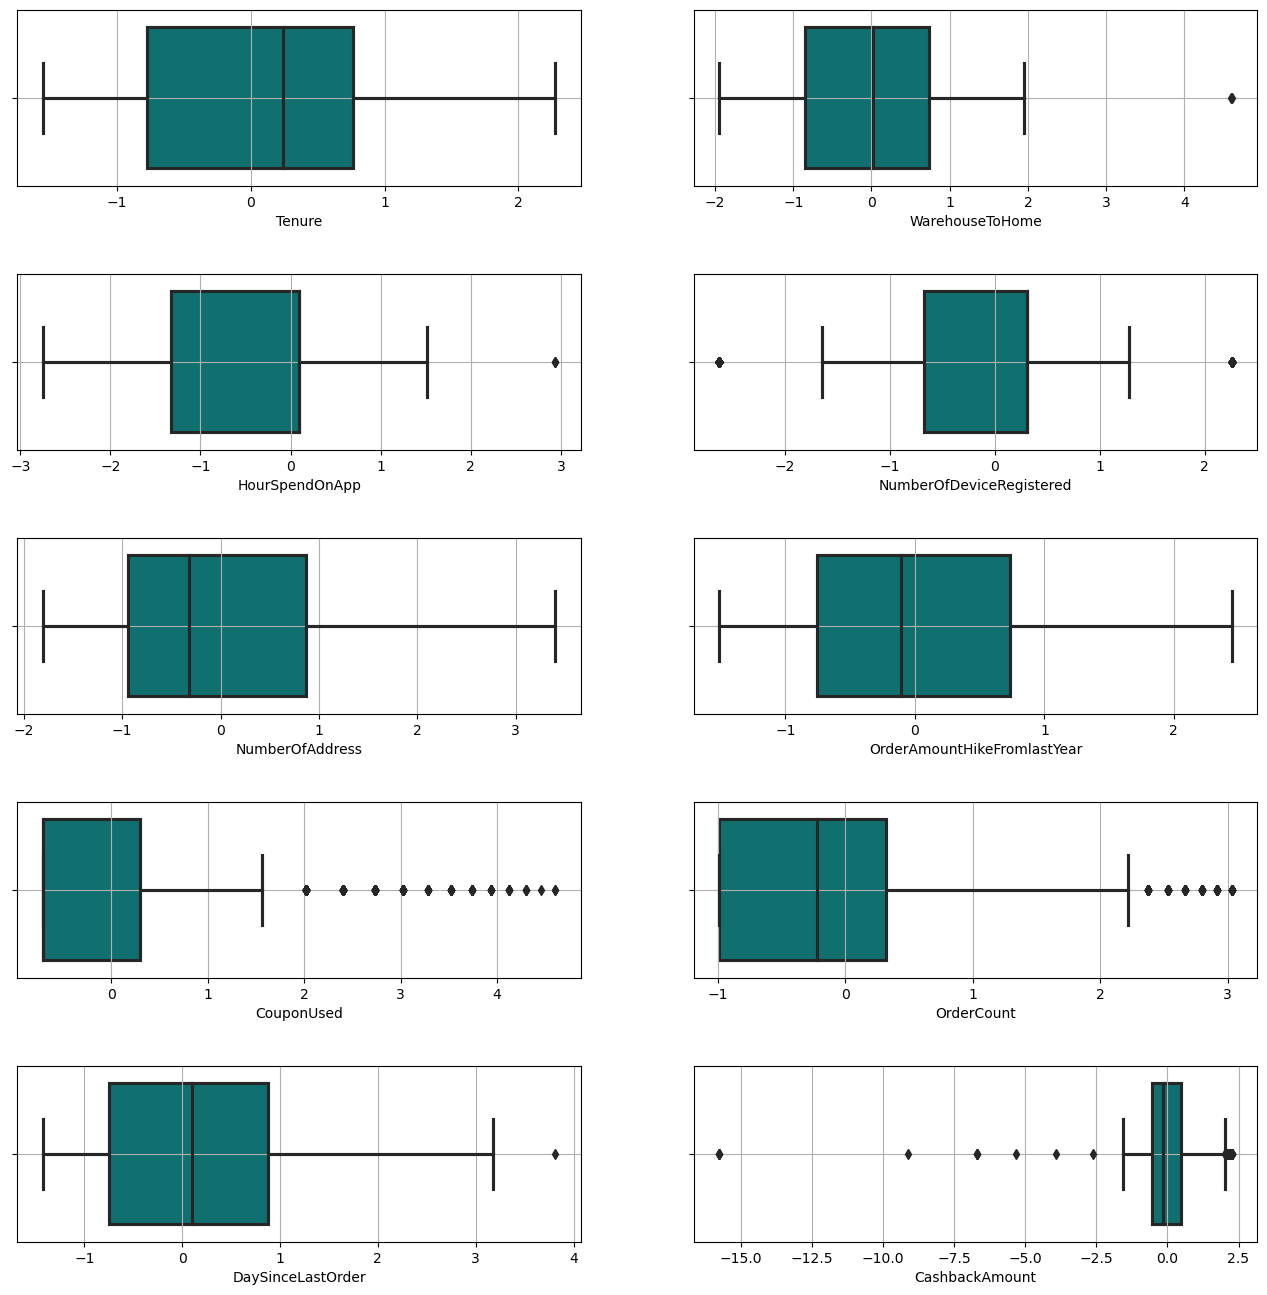

In [ ]:
plot_box_numerical(df_eda, "Churn", graph_numerical_data.columns)

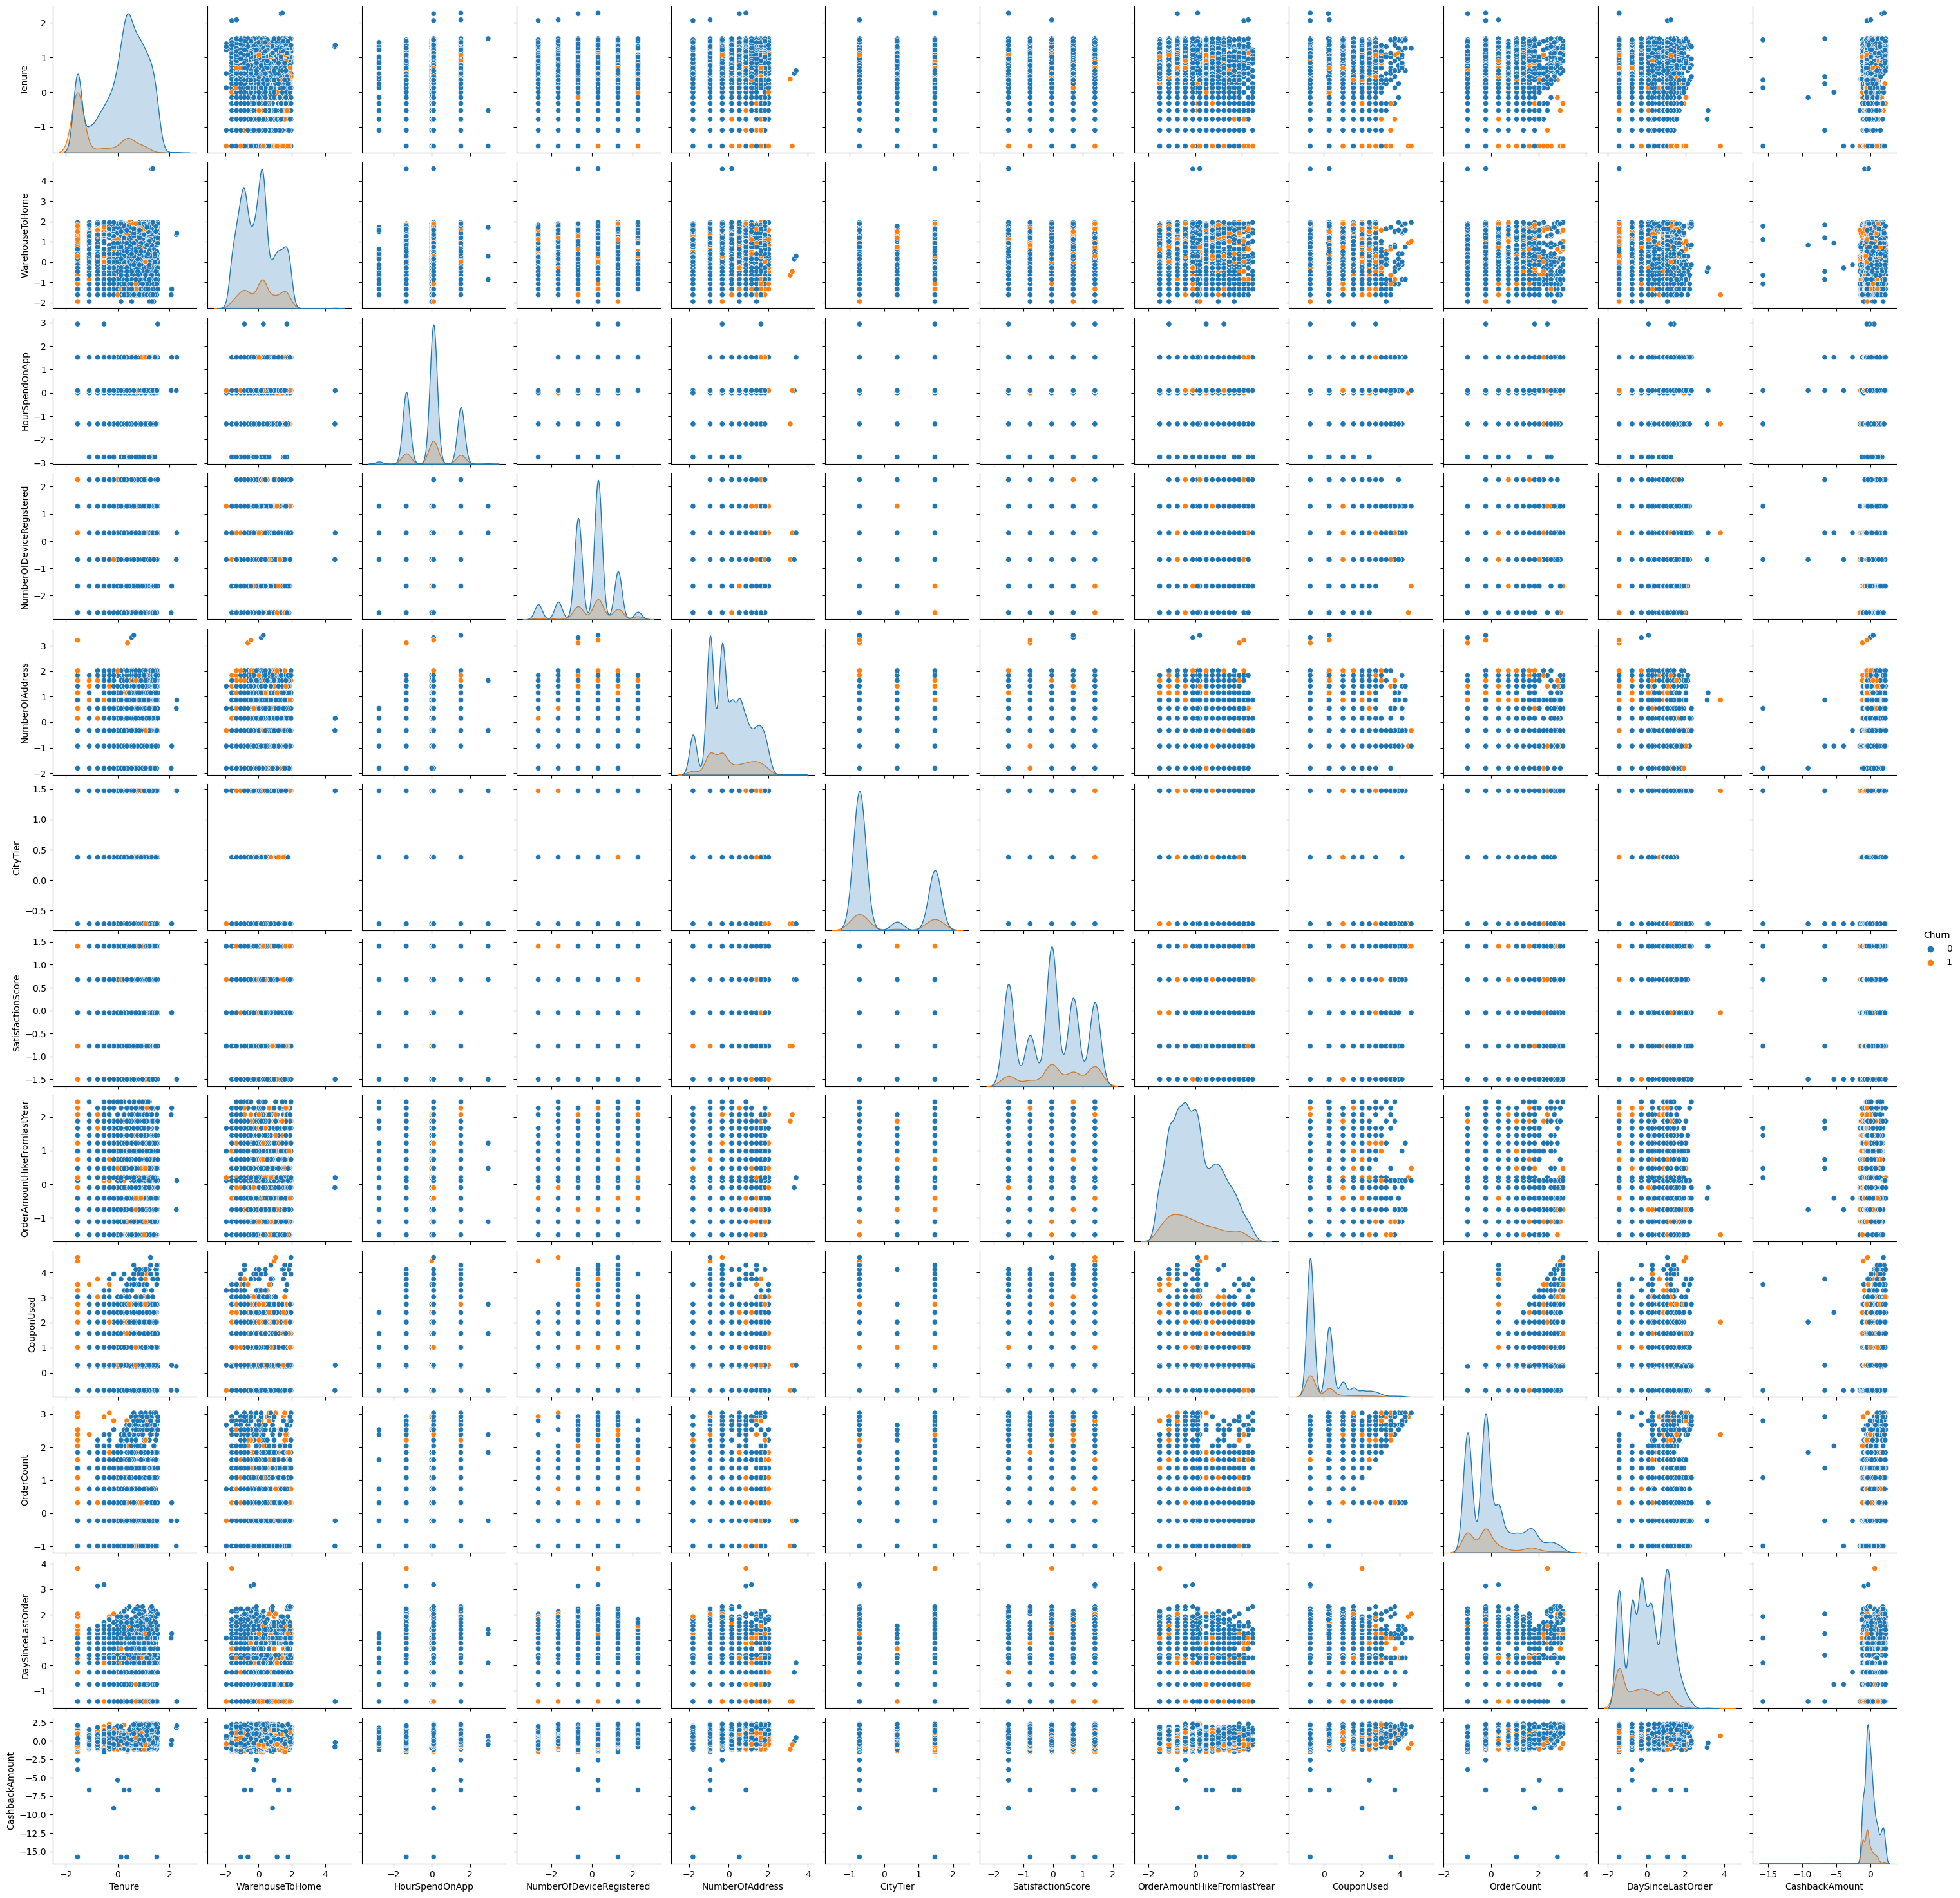

In [ ]:
matplotlib.rc_file_defaults() # to reset seaborn plotting style
sns.pairplot(df_eda, vars =numerical_data.columns , hue = "Churn", diag_kind = 'kde', height=2.5, aspect=1)

In [ ]:
numerical_data = data[numerical_cols]
categorical_data = data[categorical_cols]
df = pd.concat([categorical_data, numerical_data], axis = 1)
df

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                   Phone                  UPI    Male              Mobile   
2                   Phone           Debit Card    Male              Mobile   
3                   Phone           Debit Card    Male  Laptop & Accessory   
4                   Phone                   CC    Male              Mobile   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  Complain  Tenure  WarehouseToHome  HourSpendOnApp  \
0           Single         1     4.0              6.0             3.0   
1           Single         1     NaN              8.0             3.0   
2           Single         1     NaN             30.0             2.0   
3           Single         0     0.0             15.0             2.0   
4           Single         0     0.0             12.0             NaN   
...            ...       ...     ...              ...             ...   
5625       Married         0    10.0             30.0             3.0   
5626       Married         0    13.0             13.0             3.0   
5627       Married         1     1.0             11.0             3.0   
5628       Married         0    23.0              9.0             4.0   
5629       Married         0     8.0             15.0             3.0   

      NumberOfDeviceRegistered  NumberOfAddress  CityTier  SatisfactionScore  \
0                            3                9         3                  2   
1                            4                7         1                  3   
2                            4                6         1                  3   
3                            4                8         3                  5   
4                            3                3         1                  5   
...                        ...              ...       ...                ...   
5625                         2                6         1                  1   
5626                         5                6         1                  5   
5627                         2                3         1                  4   
5628                         5                4         3                  4   
5629                         2                4         1                  3   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                            11.0         1.0         1.0                5.0   
1                            15.0         0.0         1.0                0.0   
2                            14.0         0.0         1.0                3.0   
3                            23.0         0.0         1.0                3.0   
4                            11.0         1.0         1.0                3.0   
...                           ...         ...         ...                ...   
5625                         18.0         1.0         2.0                4.0   
5626                         16.0         1.0         2.0                NaN   
5627                         21.0         1.0         2.0                4.0   
5628                         15.0         2.0         2.0                9.0   
5629                         13.0         2.0         2.0                3.0   

      CashbackAmount  
0                160  
1                121  
2                120  
3                134  
4                130  
...              ...  
5625             151  
5626             225  
5627             186  
5628             179  
5629            

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)
X_train.head(), y_train.head()

(     PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
 4478         Mobile Phone           Debit Card  Female        Mobile Phone   
 3685         Mobile Phone          Credit Card  Female  Laptop & Accessory   
 731                 Phone           Debit Card    Male              Mobile   
 291              Computer           Debit Card    Male        Mobile Phone   
 184                 Phone                  COD    Male        Mobile Phone   
 
      MaritalStatus  Complain  Tenure  WarehouseToHome  HourSpendOnApp  \
 4478        Single         1     1.0             12.0             3.0   
 3685        Single         1    17.0             13.0             4.0   
 731         Single         0     0.0              9.0             NaN   
 291       Divorced         1     NaN              8.0             2.0   
 184       Divorced         1     4.0             11.0             2.0   
 
       NumberOfDeviceRegistered  NumberOfAddress  CityTier  SatisfactionScore 

In [ ]:
log_transformer = FunctionTransformer(np.log1p)

numeric_median_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log1p', log_transformer),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor_median = ColumnTransformer(
    transformers=[
        ('num', numeric_median_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log1p', log_transformer),
    ('scaler', StandardScaler())])

preprocessor_mean = ColumnTransformer(
    transformers=[
        ('num', numeric_mean_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [ ]:
prepro_median = Pipeline(steps=[('preprocessor', preprocessor_median)])
prepro_mean = Pipeline(steps=[('preprocessor', preprocessor_mean)])

In [ ]:
X_train_preprocessed_median = prepro_median.fit_transform(X_train)
X_test_preprocessed_median = prepro_median.transform(X_test)

X_train_preprocessed_mean = prepro_mean.fit_transform(X_train)
X_test_preprocessed_mean = prepro_mean.transform(X_test)

In [ ]:
pd.DataFrame(X_train_preprocessed_median)

0         1         2         3         4         5         6   \
0    -1.308562 -0.283158  0.174517  0.368590 -0.317894 -0.724353  0.717156   
1     0.866291 -0.124573  1.366739  1.096783 -0.317894 -0.724353  0.136067   
2    -1.994652 -0.844596  0.174517  0.368590 -0.930745 -0.724353  0.136067   
3     0.284489 -1.070058 -1.362526 -0.522646 -0.930745 -0.724353 -0.613087   
4    -0.401601 -0.454443 -1.362526 -0.522646 -1.794511 -0.724353 -0.613087   
...        ...       ...       ...       ...       ...       ...       ...   
4499 -1.308562  1.358704  1.366739  0.368590 -0.930745 -0.724353  0.136067   
4500  0.378829  0.290904  0.174517  0.368590  0.874261  1.449091 -1.668960   
4501  0.063618 -0.454443  0.174517  1.096783  1.837128 -0.724353  0.717156   
4502 -1.308562  1.955127  1.366739  0.368590 -0.317894 -0.724353  1.191940   
4503 -1.994652  1.433796  0.174517 -0.522646 -0.930745 -0.724353  0.136067   

            7         8         9   ...   25   26   27   28   29   30   31  \
0    -0.753655 -0.271024 -0.208966  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1    -0.103121  0.466772 -0.208966  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2    -1.114692 -1.532294 -0.969900  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3     1.872210 -0.271024 -0.969900  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
4    -1.114692 -1.532294 -0.969900  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
4499 -0.103121  0.466772 -0.208966  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4500 -1.114692  1.728042  1.091860  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4501 -1.114692  0.466772 -0.208966  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
4502 -0.417538  0.466772 -0.208966  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
4503 -0.103121  0.990246  1.381153  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0   

       32   33   34  
0     1.0  0.0  1.0  
1     1.0  0.0  1.0  
2     1.0  1.0  0.0  
3     0.0  0.0  1.0  
4     0.0  0.0  1.0  
...   ...  ...  ...  
4499  1.0  1.0  0.0  
4500  0.0  1.0  0.0  
4501  0.0  1.0  0.0  
4502  0.0  1.0  0.0  
4503  0.0  0.0  1.0  

[4504 rows x 35 columns]

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
y_train_for_median = y_train
y_train_for_mean = y_train
X_train_preprocessed_mean, y_train_for_mean = sm.fit_resample(X_train_preprocessed_mean, y_train_for_mean)
X_train_preprocessed_median, y_train_for_median = sm.fit_resample(X_train_preprocessed_median, y_train_for_median)
X_train_preprocessed_mean.shape, y_train_for_mean.shape
X_train_preprocessed_median.shape, y_train_for_median.shape

((7482, 35), (7482, 1))

In [ ]:
y_test.value_counts()

Churn
0        941
1        185
dtype: int64

## **Modelling**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
lgr = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 5)
dtc = DecisionTreeClassifier(random_state = 42)
svc = SVC(random_state = 42,probability=True)
mlp = MLPClassifier(max_iter=1000, random_state=42)
clf = {'LogisticRegression': lgr,  'DecisionTree': dtc, 'MultiLayerPerceptron': mlp}

In [ ]:
def train_all_model(clf, imputed_median_set, imputed_mean_set):
    combined = [imputed_median_set, imputed_mean_set]
    accuracy_score = []

    std = []
    temp = {}
    count = 0
    for train_set in combined:
        count +=1
        accuracy_score = []
        std = []
        for key in clf.keys():
            score = cross_val_score(estimator=clf[key], X=train_set[0], y=train_set[1].values.ravel(), cv = 10)
            accuracy_score.append(score.mean())
            std.append(score.std())
#             print(score.mean())
        temp['accuracy_score'+str(count)] = accuracy_score
        temp['standard_deviation'+ str(count)] = std
    return pd.DataFrame(temp, index = clf.keys())


In [ ]:
models_df = train_all_model(clf, [X_train_preprocessed_median, y_train_for_median], [X_train_preprocessed_mean, y_train_for_mean])
models_df

accuracy_score1  standard_deviation1  accuracy_score2  \
LogisticRegression           0.831868             0.015199         0.830532   
DecisionTree                 0.951763             0.023408         0.949625   
MultiLayerPerceptron         0.986902             0.004885         0.985834   

                      standard_deviation2  
LogisticRegression               0.013986  
DecisionTree                     0.024889  
MultiLayerPerceptron             0.005041

In [ ]:
lgr_params = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'solver' : ['newton-cg','lbfgs', 'liblinear', 'sag','saga'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
dtc_params = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4,5],
    'ccp_alpha':[0.01,0.02,0.03,0.04]
    }
mlp_params = {
    'activation' : ['tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    }
svc_params = {
    'C': [0.1,1,10,100,1000], 
    'gamma': [1,0.1,0.01,0.001,0.0001], 
    'kernel': ['rbf']
}
knn_params = {
    'n_neighbors': [x for x in range(3,50, 2)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

classifiers = {'LogisticRegression': lgr, 'DecisionTree': dtc, 'MultiLayerPerceptron': mlp, 
               'SupportVectorMachine': svc, 'K-NearestNeighbour': knn}
params_list = [lgr_params, dtc_params, mlp_params, svc_params, knn_params]

def automated_grid_search(classifiers, params_list):
    for key , params in zip(classifiers.keys(), params_list):
        gcv = GridSearchCV(estimator = classifiers[key], param_grid = params, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 1)
        gcv = gcv.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
        print(gcv.best_score_)
        print(gcv.best_estimator_)
        classifiers[key] =  gcv.best_estimator_
    return classifiers

In [ ]:
# Drop unwanted columns for rfc model
categorical_cols_for_rfc = ["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus", "Complain"]
categorical_data_for_rfc = data[categorical_cols_for_rfc]
numerical_cols_for_rfc = ["Tenure", "WarehouseToHome", "NumberOfDeviceRegistered", "NumberOfAddress", "SatisfactionScore", 
                  "OrderAmountHikeFromlastYear", "DaySinceLastOrder", "CashbackAmount"]
numerical_data_for_rfc = data[numerical_cols_for_rfc]
# New dataframe for rfc model
df_for_rfc = pd.concat([categorical_data_for_rfc, numerical_data_for_rfc], axis = 1)

In [ ]:
X_train_for_rfc, X_test_for_rfc, y_train_for_rfc, y_test_for_rfc = train_test_split(df_for_rfc, y, test_size = 0.2, random_state = 42)
# Preprocess pipeline
prepro_median_rfc = ColumnTransformer(
    transformers=[
        ('num', numeric_median_transformer, numerical_cols_for_rfc),
        ('cat', categorical_transformer, categorical_cols_for_rfc)])
X_train_preprocessed_rfc = prepro_median_rfc.fit_transform(X_train_for_rfc)
X_test_preprocessed_rfc = prepro_median_rfc.transform(X_test_for_rfc)
# SMOTE
X_train_preprocessed_rfc, y_train_for_rfc = sm.fit_resample(X_train_preprocessed_rfc, y_train_for_rfc)

In [ ]:
rfc_params = {
    'min_samples_leaf': [1,5,10,15], 
    'n_estimators': [1,10,100,500,1000], 
    'max_features': ['auto','sqrt','log2']
}

gcv_rfc = GridSearchCV(estimator = rfc, param_grid = rfc_params, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 1)
gcv_rfc.fit(X_train_preprocessed_rfc, y_train_for_rfc)
print(gcv_rfc.best_score_)
print(gcv_rfc.best_estimator_)
rfct = gcv_rfc.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\tkyua\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.9764807690246803
RandomForestClassifier(max_features='log2', n_estimators=1000, random_state=42)


In [ ]:
tuned_classifiers = automated_grid_search(classifiers, params_list)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


C:\Users\tkyua\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.72333714        nan 0.74739506 0.82517995
 0.82517995 0.82197264 0.82504626 0.82517995        nan        nan
        nan        nan        nan        nan        nan 0.81021115
        nan 0.81061231 0.82999305 0.82999305 0.8302607  0.82999305
 0.82999305        nan        nan        nan        nan        nan
        nan        nan 0.83106203        nan 0.83092843 0.83253253
 0.83253253 0.83279973 0.83266613 0.83266613        nan        nan
        nan        nan        nan        nan        nan 0.83186471
        nan 0.83186462 0.83199831 0.83199831 0.83199831 0.83199831
 0.83199831        nan        nan        nan        nan        nan
        nan        nan 0.83266667        nan 0.83266667 0.83266667
 0.83266667 0.83266667 0.83266667 0.83253307        nan        nan
        nan        nan        nan        nan        n

0.8328003600784456
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
Fitting 5 folds for each of 3136 candidates, totalling 15680 fits
0.8206378889686681
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_leaf_nodes=11,
                       random_state=42)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.986903218201108
MLPClassifier(activation='tanh', alpha=0.05, max_iter=1000, random_state=42)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
0.9899770128492278
SVC(C=100, gamma=0.1, probability=True, random_state=42)
Fitting 5 folds for each of 49 candidates, totalling 245 fits
0.9823574957401433
KNeighborsClassifier(n_neighbors=2)


# Decision Tree

In [ ]:
dtc.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
tree_pred = dtc.predict(X_test_preprocessed_median)
print(classification_report(y_test, tree_pred))
print(confusion_matrix(y_test,tree_pred))
print("Accuracy for training: {}".format(dtc.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(dtc.score(X_test_preprocessed_median, y_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       941
           1       0.89      0.89      0.89       185

    accuracy                           0.96      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.96      0.96      0.96      1126

[[921  20]
 [ 21 164]]
Accuracy for training: 1.0
Accuracy for testing : 0.9635879218472468


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

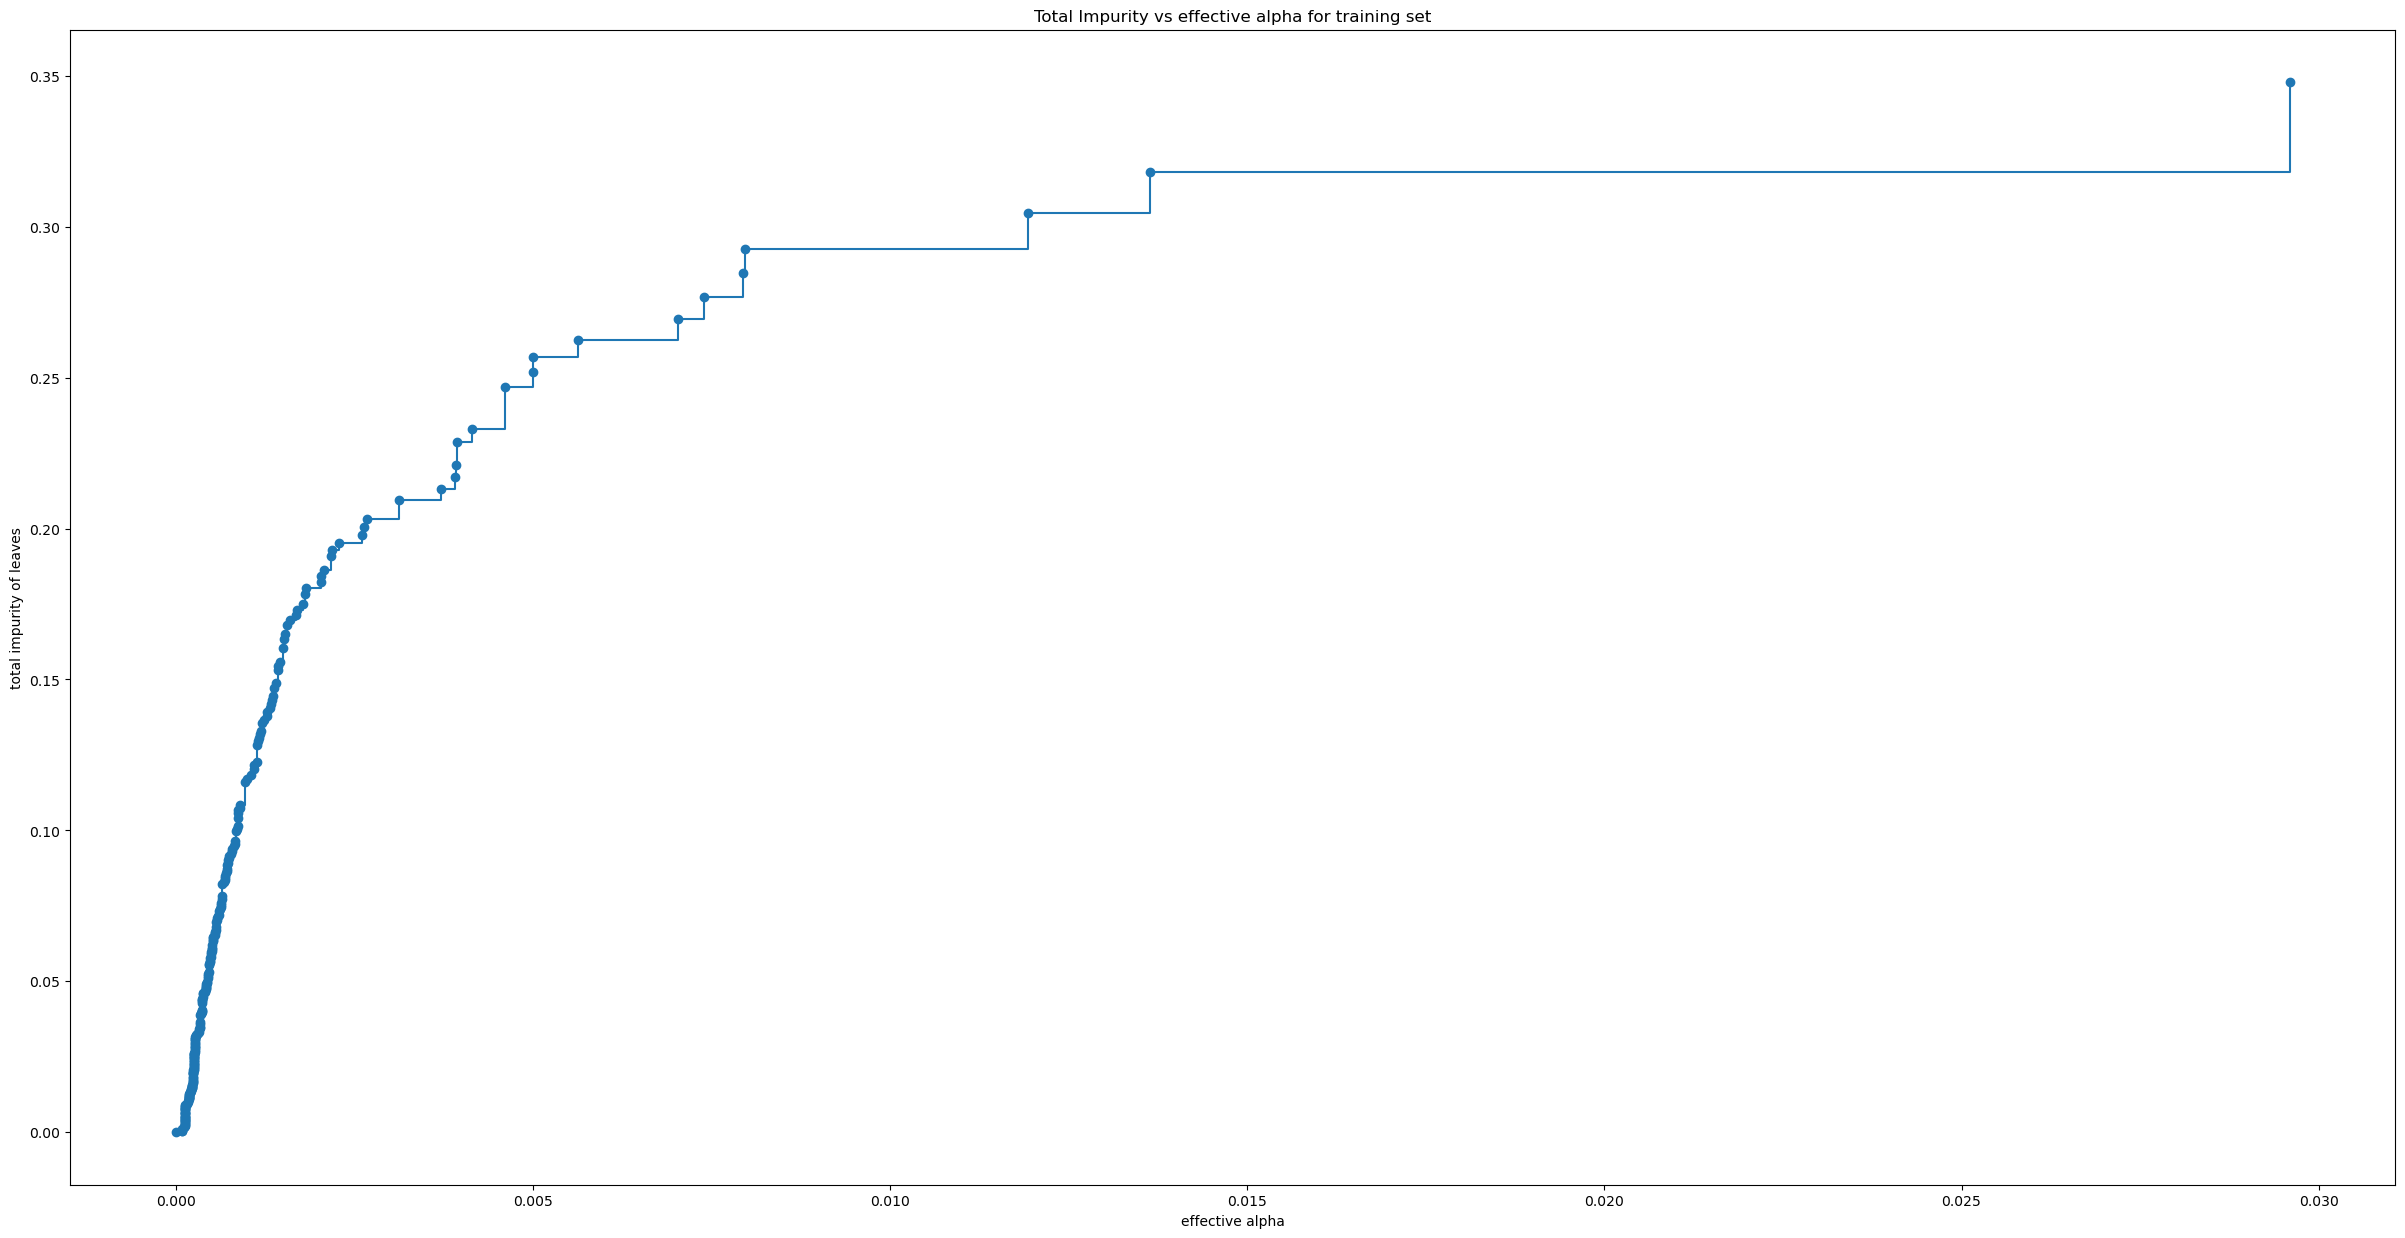

In [ ]:
path = dtc.cost_complexity_pruning_path(X_train_preprocessed_median, y_train_for_median)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots(figsize= (30,15))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
dtcs = []
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtc.fit(X_train_preprocessed_median, y_train_for_median)
    dtcs.append(dtc)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dtcs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.1521213108287412


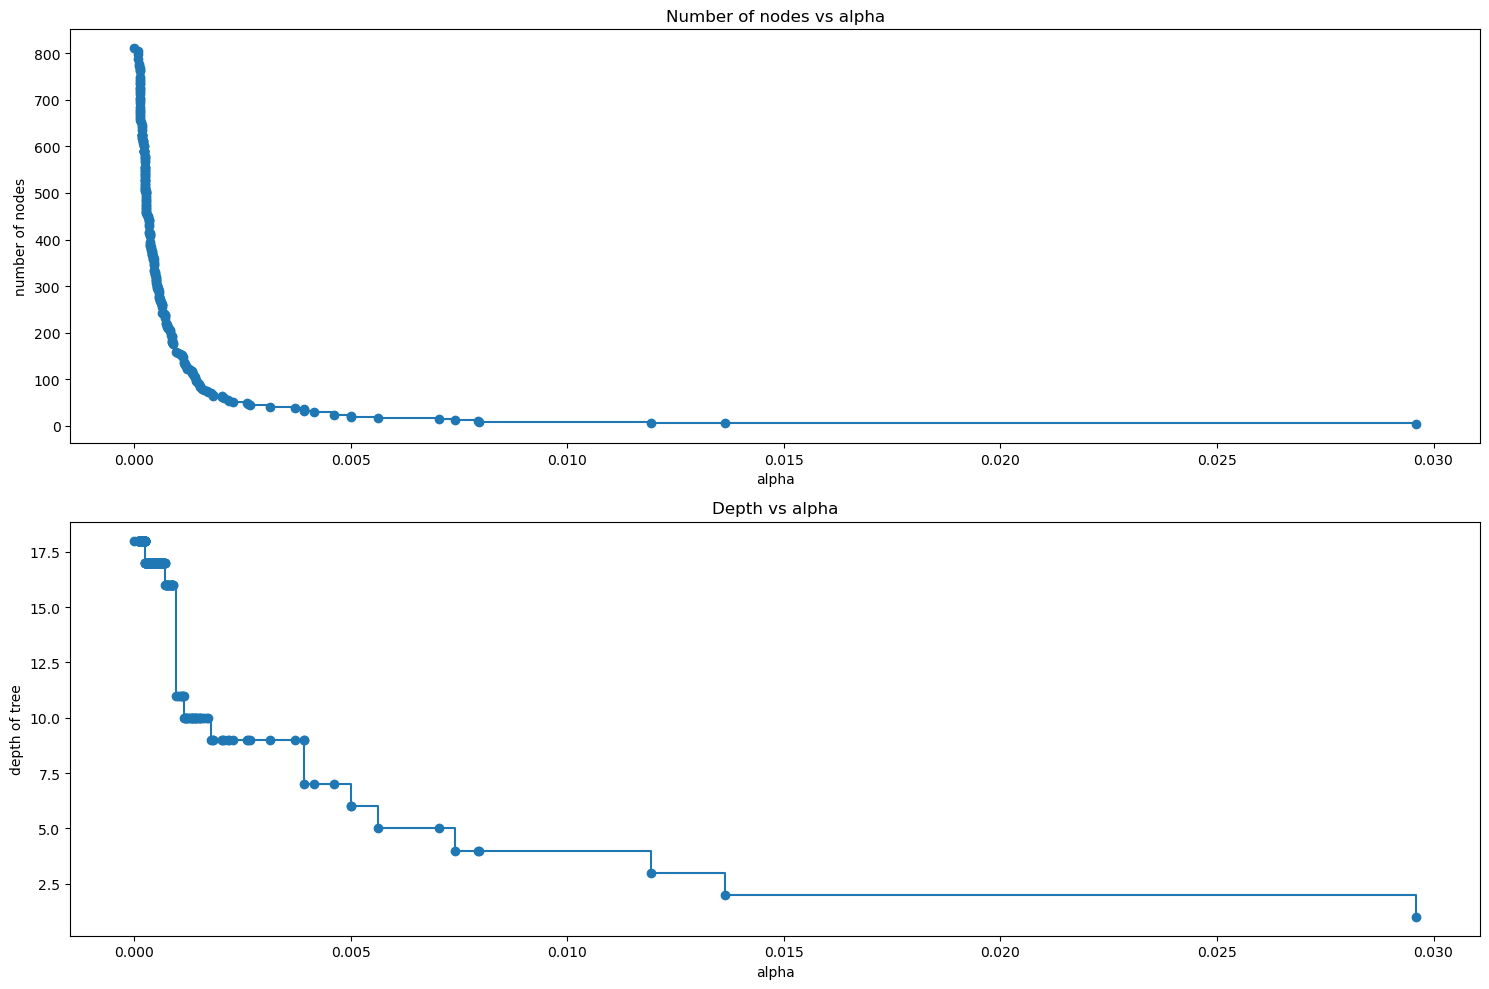

In [ ]:
dtcs  = dtcs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dtc.tree_.node_count for dtc in dtcs ]
depth = [dtc.tree_.max_depth for dtc in dtcs ]
fig, ax = plt.subplots(2, 1, figsize = (15,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

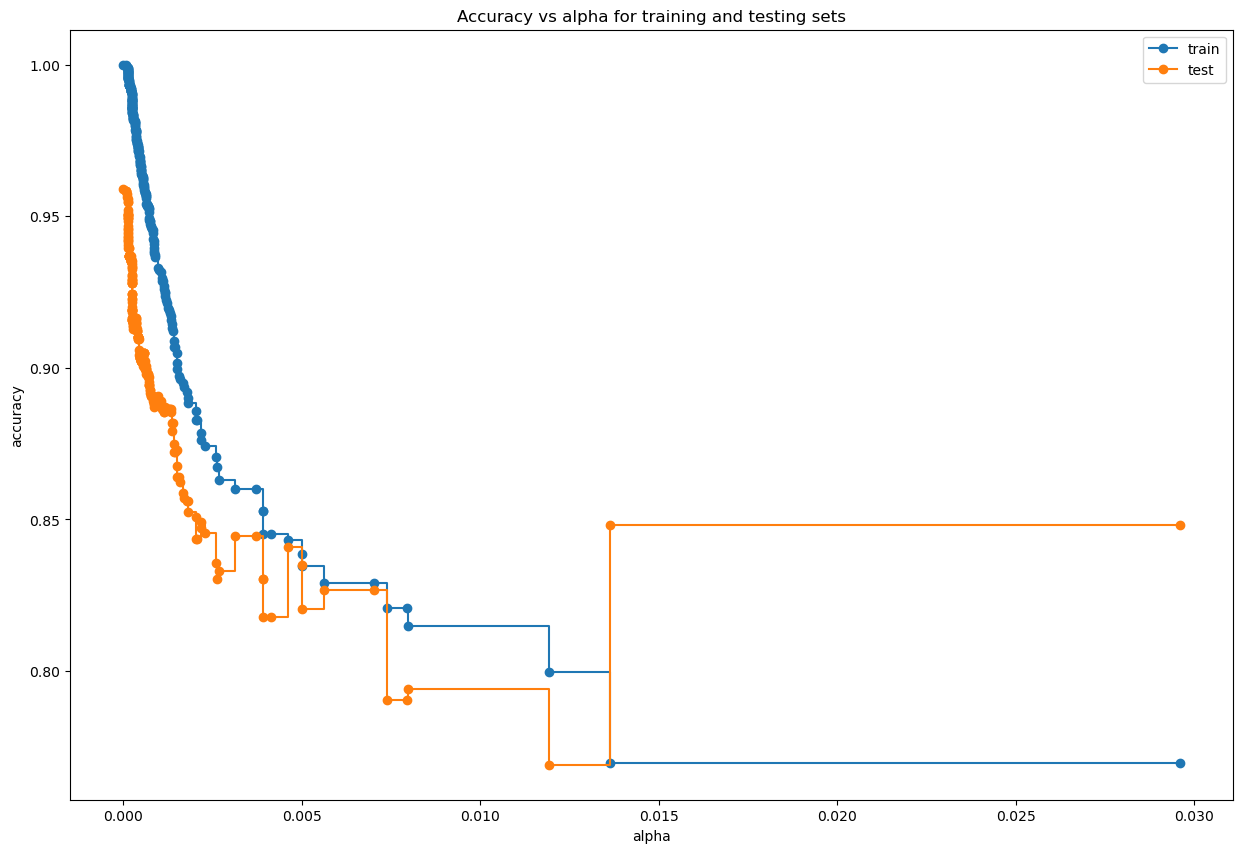

In [ ]:
train_scores = [dtc.score(X_train_preprocessed_median, y_train_for_median) for dtc in dtcs]
test_scores = [dtc.score(X_test_preprocessed_median, y_test) for dtc in dtcs]

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

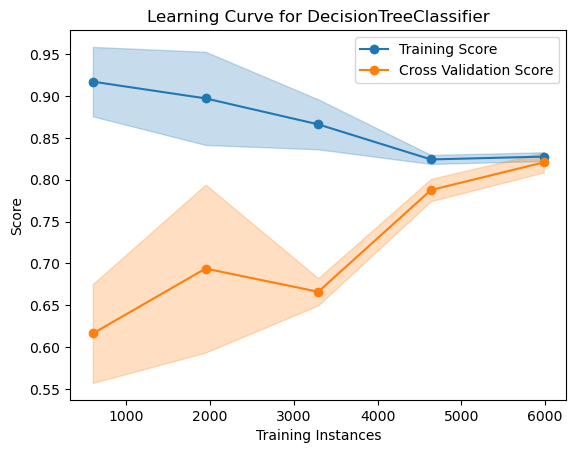

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
dtct = tuned_classifiers['DecisionTree']

dtct_visualizer = LearningCurve(dtct,  cv=5,scoring ='accuracy', n_jobs = -1)
dtct_visualizer.fit(X_train_preprocessed_median, y_train_for_median)
dtct_visualizer.show()

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       941
           1       0.49      0.83      0.61       185

    accuracy                           0.83      1126
   macro avg       0.72      0.83      0.75      1126
weighted avg       0.88      0.83      0.84      1126

[[778 163]
 [ 31 154]]
Accuracy for training: 0.8291900561347233
Accuracy for testing: 0.827708703374778




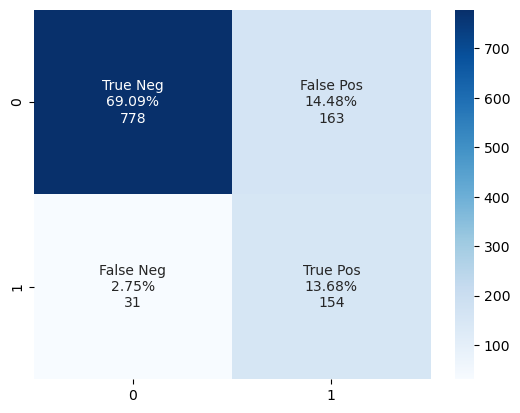

In [ ]:
dtct.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
tree_pred = dtct.predict(X_test_preprocessed_median)
print(classification_report(y_test, tree_pred))
print(confusion_matrix(y_test,tree_pred))
print("Accuracy for training: {}".format(dtct.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing: {}\n\n".format(dtct.score(X_test_preprocessed_median, y_test)))

tree_cf = confusion_matrix(y_test,tree_pred)
names = ['True Neg', 'False Pos','False Neg','True Pos']
percentages = ['{0:.2%}'.format(value) for value in tree_cf.flatten()/np.sum(tree_cf)]
counts = ['{0:0.0f}'.format(value) for value in tree_cf.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(tree_cf, annot=labels, fmt='', cmap='Blues');

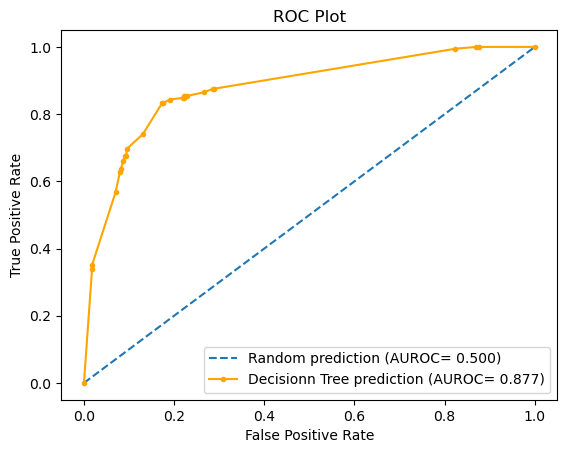

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model_tuned = dtct
model = CalibratedClassifierCV(model_tuned)
model.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
random_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test_preprocessed_median)
model_probs = model_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
#Calculate Area under ROC Curve
random_auc = roc_auc_score(y_test, random_probs)
model_auc = roc_auc_score(y_test, model_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

import matplotlib.pyplot as plt
plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='Decisionn Tree prediction (AUROC= %0.3f)' %model_auc, color = 'orange')

plt.title('ROC Plot')
#Axis Lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()
#Show plot
plt.show()

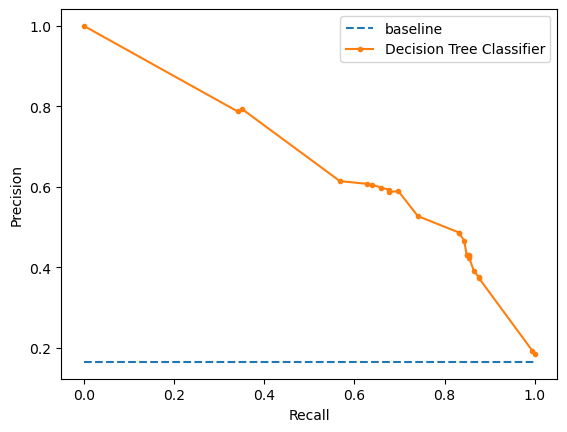

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
y_hat = dtct.predict(X_test_preprocessed_median)
model_precision, model_recall, _ = precision_recall_curve(y_test, model_probs)
model_f1 = f1_score(y_test, y_hat)
model_auc = auc(model_recall, model_precision)
no_skill = 185/(941+185)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label= 'baseline')
plt.plot(model_recall, model_precision, marker='.', label='Decision Tree Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
#Show the legend
plt.legend()
#Show plot
plt.show()

# Logistic Regression

In [ ]:
# Standard logistic regression
lgr.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
lgr_pred = lgr.predict(X_test_preprocessed_median)
print(classification_report(y_test, lgr_pred))
print(confusion_matrix(y_test,lgr_pred))
print("Accuracy for training: {}".format(lgr.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing: {}\n\n".format(lgr.score(X_test_preprocessed_median, y_test)))



              precision    recall  f1-score   support

           0       0.96      0.85      0.91       941
           1       0.53      0.83      0.65       185

    accuracy                           0.85      1126
   macro avg       0.75      0.84      0.78      1126
weighted avg       0.89      0.85      0.86      1126

[[804 137]
 [ 31 154]]
Accuracy for training: 0.8336006415396953
Accuracy for testing: 0.8507992895204263




C:\Users\tkyua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tkyua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tkyua\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1358, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\tkyua\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 935, in _fit_liblinear
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"


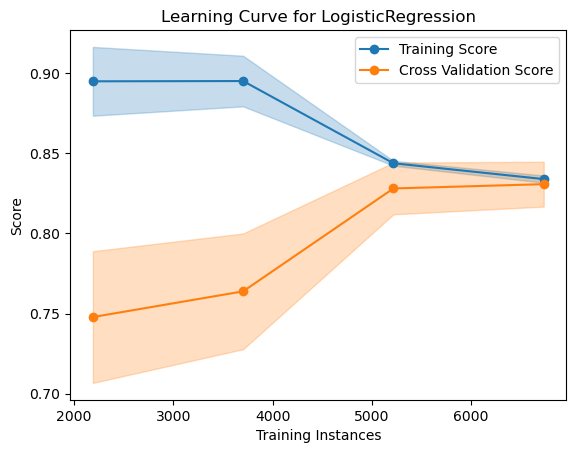

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
lgrt = tuned_classifiers['LogisticRegression']
lgrt_visualizer = LearningCurve(lgrt, cv=10, scoring ='accuracy', n_jobs = -1)
lgrt_visualizer.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
lgrt_visualizer.show()

LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       941
           1       0.53      0.82      0.64       185

    accuracy                           0.85      1126
   macro avg       0.74      0.84      0.77      1126
weighted avg       0.89      0.85      0.86      1126

Accuracy for training: 0.8325314087142476
Accuracy for testing : 0.8490230905861457

Confusion Matrix: 


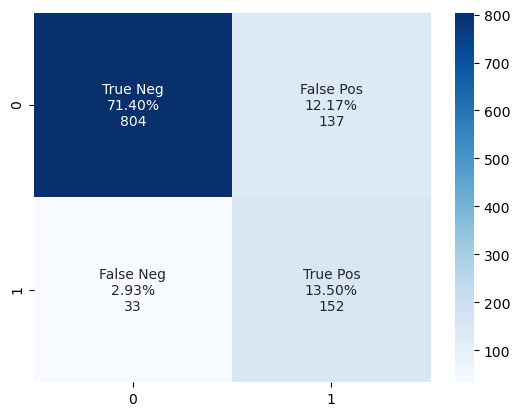

In [ ]:
#Tuned Logistic Regression
print (lgrt)
lgrt.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
lgrt_pred = lgrt.predict(X_test_preprocessed_median)

#Confusion Matrix
lgrt_cf_matrix = confusion_matrix(y_test,lgrt_pred)
names = ['True Neg', 'False Pos','False Neg','True Pos']
percentages = ['{0:.2%}'.format(value) for value in lgrt_cf_matrix.flatten()/np.sum(lgrt_cf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in lgrt_cf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print('Classification Report: \n')
print(classification_report(y_test, lgrt_pred))
print("Accuracy for training: {}".format(lgrt.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(lgrt.score(X_test_preprocessed_median, y_test)))
print('\nConfusion Matrix: ')
sns.heatmap(lgrt_cf_matrix, annot=labels, fmt='', cmap='Blues');

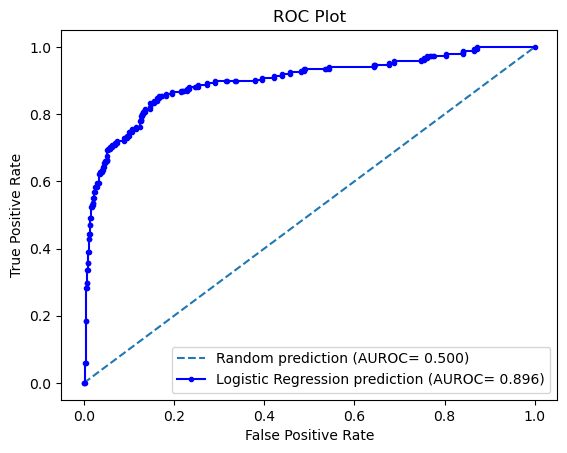

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model_tuned = lgrt
model = CalibratedClassifierCV(model_tuned)
model.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
random_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test_preprocessed_median)
model_probs = model_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
#Calculate Area under ROC Curve
random_auc = roc_auc_score(y_test, random_probs)
model_auc = roc_auc_score(y_test, model_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

import matplotlib.pyplot as plt
plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression prediction (AUROC= %0.3f)' %model_auc, color = 'blue')

plt.title('ROC Plot')
#Axis Lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()
#Show plot
plt.show()

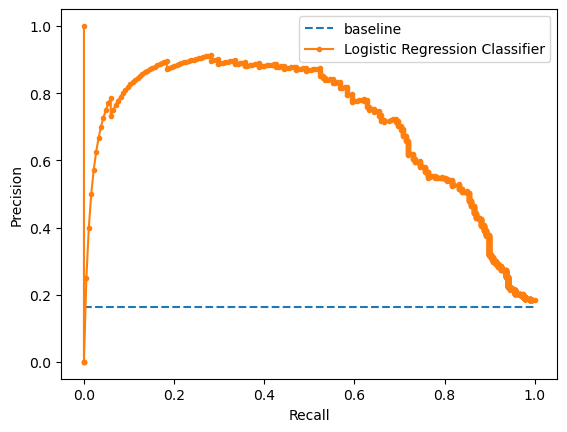

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
y_hat = lgrt.predict(X_test_preprocessed_median)
model_precision, model_recall, _ = precision_recall_curve(y_test, model_probs)
model_f1 = f1_score(y_test, y_hat)
model_auc = auc(model_recall, model_precision)
no_skill = 185/(941+185)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label= 'baseline')
plt.plot(model_recall, model_precision, marker='.', label='Logistic Regression Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
#Show the legend
plt.legend()
#Show plot
plt.show()

# Neural Networks

In [ ]:
# Standard Neural Networks
mlp.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
mlp_pred = mlp.predict(X_test_preprocessed_median)
print(classification_report(y_test, mlp_pred))
print(confusion_matrix(y_test, mlp_pred))
print("Accuracy for training: {}".format(mlp.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(mlp.score(X_test_preprocessed_median, y_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       941
           1       0.92      0.85      0.89       185

    accuracy                           0.96      1126
   macro avg       0.95      0.92      0.93      1126
weighted avg       0.96      0.96      0.96      1126

[[928  13]
 [ 27 158]]
Accuracy for training: 1.0
Accuracy for testing : 0.9644760213143873


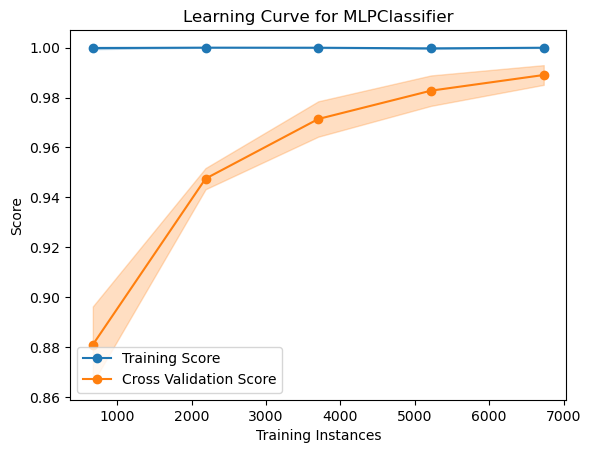

<AxesSubplot:title={'center':'Learning Curve for MLPClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
mlpt = tuned_classifiers['MultiLayerPerceptron']
mlpt_visualizer = LearningCurve(mlpt, cv=10, scoring ='accuracy', n_jobs = -1)
mlpt_visualizer.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
mlpt_visualizer.show()

MLPClassifier(activation='tanh', alpha=0.05, max_iter=1000, random_state=42)
Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       941
           1       0.97      0.92      0.95       185

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126

Accuracy for training: 1.0
Accuracy for testing : 0.9831261101243339

Confusion Matrix: 


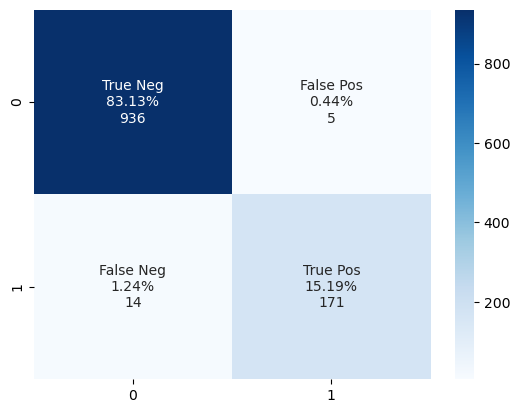

In [ ]:
#Tuned Neural Networks
print (mlpt)
mlpt.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
mlpt_pred = mlpt.predict(X_test_preprocessed_median)

#Confusion Matrix
mlpt_cf_matrix = confusion_matrix(y_test,mlpt_pred)
names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in mlpt_cf_matrix.flatten()/np.sum(mlpt_cf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in mlpt_cf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print('Classification Report: \n')
print(classification_report(y_test, mlpt_pred))
print("Accuracy for training: {}".format(mlpt.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(mlpt.score(X_test_preprocessed_median, y_test)))
print('\nConfusion Matrix: ')
sns.heatmap(mlpt_cf_matrix, annot=labels, fmt='', cmap='Blues');

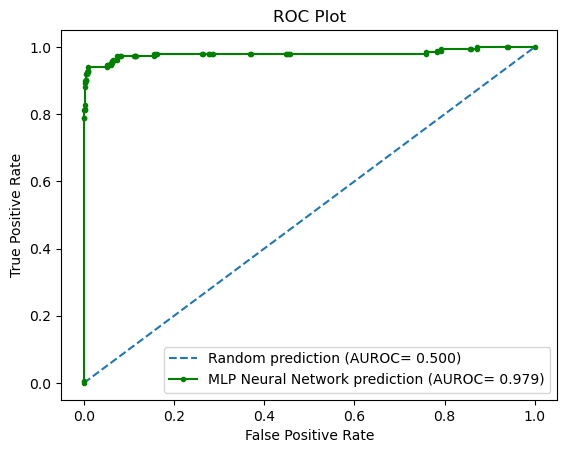

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model_tuned = mlpt
model = CalibratedClassifierCV(model_tuned)
model.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
random_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test_preprocessed_median)
model_probs = model_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
#Calculate Area under ROC Curve
random_auc = roc_auc_score(y_test, random_probs)
model_auc = roc_auc_score(y_test, model_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

import matplotlib.pyplot as plt
plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='MLP Neural Network prediction (AUROC= %0.3f)' %model_auc, color= 'green')

plt.title('ROC Plot')
#Axis Lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()
#Show plot
plt.show()

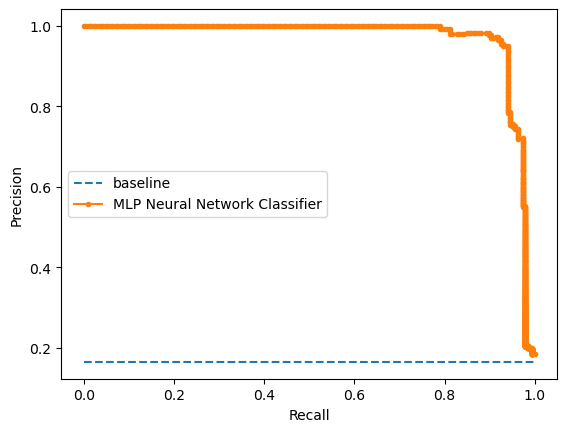

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
y_hat = mlpt.predict(X_test_preprocessed_median)
model_precision, model_recall, _ = precision_recall_curve(y_test, model_probs)
model_f1 = f1_score(y_test, y_hat)
model_auc = auc(model_recall, model_precision)
no_skill = 185/(941+185)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label= 'baseline')
plt.plot(model_recall, model_precision, marker='.', label='MLP Neural Network Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
#Show the legend
plt.legend()
#Show plot
plt.show()

# Support Vector Machine

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

In [ ]:
# Standard Support Vector Machine
svc.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
svc_pred = svc.predict(X_test_preprocessed_median)
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print("Accuracy for training: {}".format(svc.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(svc.score(X_test_preprocessed_median, y_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       941
           1       0.76      0.84      0.79       185

    accuracy                           0.93      1126
   macro avg       0.86      0.89      0.88      1126
weighted avg       0.93      0.93      0.93      1126

[[891  50]
 [ 30 155]]
Accuracy for training: 0.9691259021651965
Accuracy for testing : 0.9289520426287744


In [ ]:
#if u increase gamma, the accuraccy will decrease but the processing time will be decreasing as well and vice vers
#if u increase c value, you are pressuring on the training dataset in order to classify it very well
#gamma value, if you think your model is overfit, then reduce it and vice versa, value of c as well

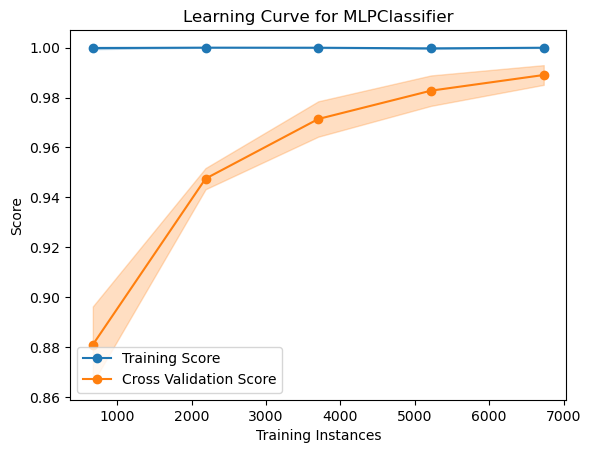

<AxesSubplot:title={'center':'Learning Curve for MLPClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
svct = tuned_classifiers["SupportVectorMachine"]
svct_visualizer = LearningCurve(svct, cv=10, scoring ='accuracy', n_jobs = -1)
svct_visualizer.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
svct_visualizer.show()

SVC(C=100, gamma=0.1, probability=True, random_state=42)
Classification Report: 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.98      0.88      0.93       185

    accuracy                           0.98      1126
   macro avg       0.98      0.94      0.96      1126
weighted avg       0.98      0.98      0.98      1126

Accuracy for training: 1.0
Accuracy for testing : 0.9769094138543517

Confusion Matrix: 


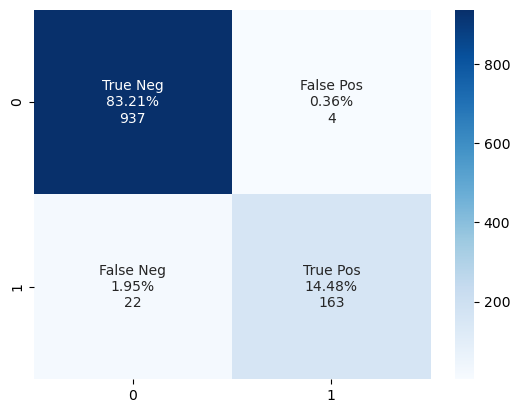

In [ ]:
# Tuned Support Vector Machine
print(svct)
svct.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
svct_pred = svct.predict(X_test_preprocessed_median)

#Confusion Matrix
svct_cf_matrix = confusion_matrix(y_test,svct_pred)
names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in svct_cf_matrix.flatten()/np.sum(svct_cf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in svct_cf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print('Classification Report: \n')
print(classification_report(y_test, svct_pred))
print("Accuracy for training: {}".format(svct.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(svct.score(X_test_preprocessed_median, y_test)))
print('\nConfusion Matrix: ')
sns.heatmap(svct_cf_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#Calculate Area under ROC Curve
random_auc = roc_auc_score(y_test, random_probs)
svc_auc = roc_auc_score(y_test, svc_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)

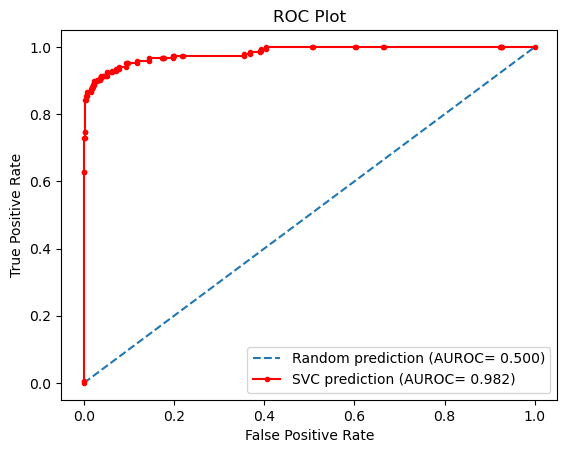

In [ ]:
import matplotlib.pyplot as plt
plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC prediction (AUROC= %0.3f)' %svc_auc, color='red')

plt.title('ROC Plot')
#Axis Lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()
#Show plot
plt.show()

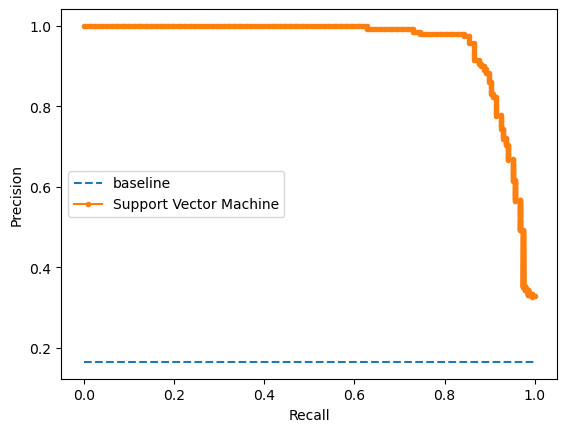

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
y_hat = svct.predict(X_test_preprocessed_median)
svc_precision, svc_recall, _ = precision_recall_curve(y_test, svc_probs)
svc_f1 = f1_score(y_test, y_hat)
svc_auc = auc(svc_recall, svc_precision)
no_skill = 185/(941+185)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label= 'baseline')
plt.plot(svc_recall, svc_precision, marker='.', label='Support Vector Machine')
plt.xlabel('Recall')
plt.ylabel('Precision')
#Show the legend
plt.legend()
#Show plot
plt.show()

# Random Forest

In [ ]:
# Standard Random Forest
rfc.fit(X_train_preprocessed_median,y_train_for_median.values.ravel())
rfc_pred = rfc.predict(X_test_preprocessed_median)
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print("Accuracy for training: {}".format(rfc.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(rfc.score(X_test_preprocessed_median, y_test)))
# print('The RFC model performance with the default parameters value is ' + str(rfc.score(X_test_preprocessed_median, y_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.99      0.87      0.93       185

    accuracy                           0.98      1126
   macro avg       0.98      0.93      0.96      1126
weighted avg       0.98      0.98      0.98      1126

[[939   2]
 [ 24 161]]
Accuracy for training: 1.0
Accuracy for testing : 0.9769094138543517


In [ ]:
importance = pd.DataFrame(rfc.feature_importances_)
print(importance)
preferredLoginDevice = importance[0][12] + importance[0][13] + importance[0][14]
preferredPaymentMode = importance[0][15] + importance[0][16] + importance[0][17]+ importance[0][18] + importance[0][19]+ importance[0][20]+ importance[0][21]
gender = importance[0][22] + importance[0][23]
PreferedOrderCat = importance[0][24] + importance[0][25]+ importance[0][26] + importance[0][27]+ importance[0][28]+ importance[0][29]
MaritalStatus = importance[0][30] + importance[0][31] + importance[0][32]
complainOrNot = importance[0][33] + importance[0][34]
print(preferredLoginDevice)
print(preferredPaymentMode)
print(gender)
print(PreferedOrderCat)
print(MaritalStatus)
print(complainOrNot)

           0
0   0.202109
1   0.044945
2   0.020239
3   0.039031
4   0.044778
5   0.020344
6   0.041259
7   0.038900
8   0.028665
9   0.027696
10  0.051788
11  0.055339
12  0.010946
13  0.017283
14  0.012089
15  0.003363
16  0.007493
17  0.003940
18  0.012444
19  0.012286
20  0.007618
21  0.004569
22  0.012151
23  0.010955
24  0.009082
25  0.004258
26  0.019600
27  0.012470
28  0.027772
29  0.001471
30  0.012626
31  0.038916
32  0.038351
33  0.048746
34  0.056478
0.04031904521142607
0.0517127356105822
0.023106586279507197
0.07465344687974518
0.08989226561911019
0.10522367365314281


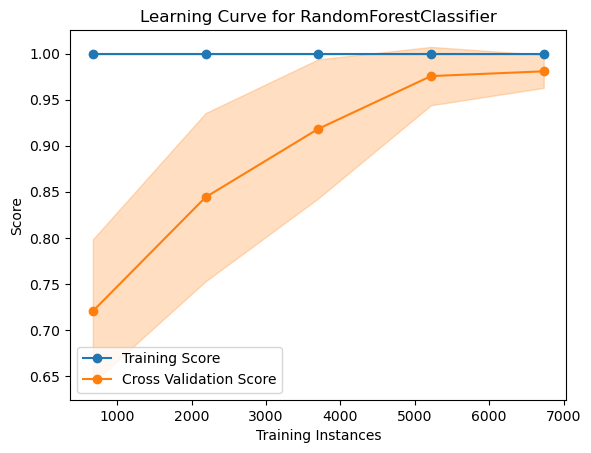

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
rfct_visualizer = LearningCurve(rfct, cv=10, scoring ='accuracy', n_jobs = -1)
rfct_visualizer.fit(X_train_preprocessed_rfc, y_train_for_rfc.values.ravel())
rfct_visualizer.show()

RandomForestClassifier(max_features='log2', n_estimators=1000, random_state=42)
Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       0.98      0.85      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.92      0.95      1126
weighted avg       0.97      0.97      0.97      1126

Accuracy for training: 1.0
Accuracy for testing : 0.9724689165186501

Confusion Matrix: 


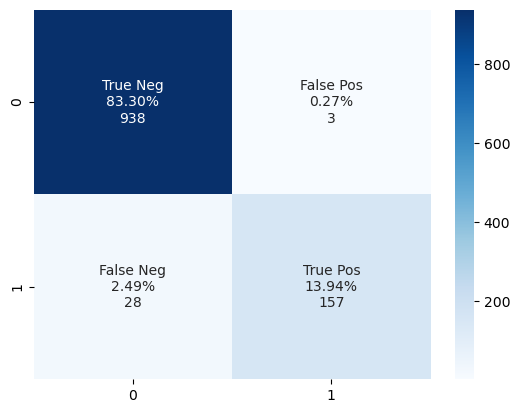

In [ ]:
#Tuned Random Forest
print (rfct)
rfct.fit(X_train_preprocessed_rfc, y_train_for_rfc.values.ravel())
rfct_pred = rfct.predict(X_test_preprocessed_rfc)

#Confusion Matrix
rfct_cf_matrix = confusion_matrix(y_test_for_rfc, rfct_pred)
names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in rfct_cf_matrix.flatten()/np.sum(rfct_cf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in rfct_cf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print('Classification Report: \n')
print(classification_report(y_test_for_rfc, rfct_pred))
print("Accuracy for training: {}".format(rfct.score(X_train_preprocessed_rfc, y_train_for_rfc)))
print("Accuracy for testing : {}".format(rfct.score(X_test_preprocessed_rfc, y_test_for_rfc)))
print('\nConfusion Matrix: ')
sns.heatmap(rfct_cf_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model_rfc = rfct
model = CalibratedClassifierCV(model_rfc)
model.fit(X_train_preprocessed_rfc, y_train_for_rfc)
random_probs = [0 for _ in range(len(y_test_for_rfc))]
rfc_probs = model.predict_proba(X_test_preprocessed_rfc)
#svc_probs = grid.predict_proba(X_test_preprocessed)
rfc_probs = rfc_probs[:, 1]
from sklearn.metrics import roc_curve, roc_auc_score
#Calculate Area under ROC Curve
random_auc = roc_auc_score(y_test_for_rfc, random_probs)
rfc_auc = roc_auc_score(y_test_for_rfc, rfc_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (random_auc))
print('Random Forestr Classifier: AUROC = %.3f' %(rfc_auc))
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test_for_rfc, rfc_probs)

C:\Users\tkyua\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Random (chance) Prediction: AUROC = 0.500
Random Forestr Classifier: AUROC = 0.976


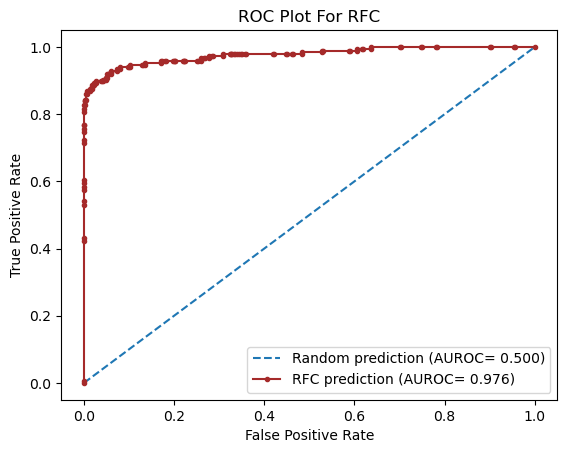

In [ ]:
import matplotlib.pyplot as plt
plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC prediction (AUROC= %0.3f)' %rfc_auc, color="brown")
plt.title('ROC Plot For RFC')
#Axis Lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()
#Show plot
plt.show()

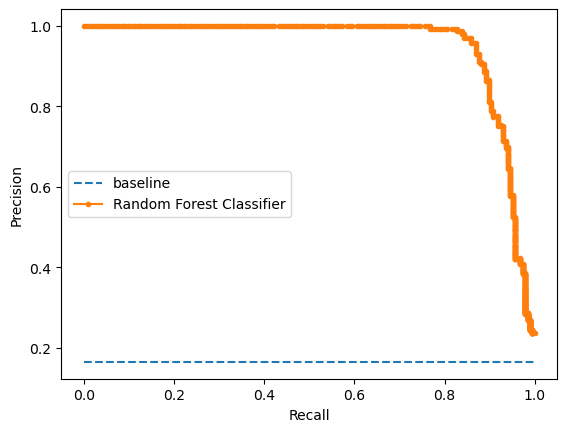

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
y_hat = rfct.predict(X_test_preprocessed_rfc)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test_for_rfc, rfc_probs)
rfc_f1 = f1_score(y_test_for_rfc, y_hat)
rfc_auc = auc(rfc_recall, rfc_precision)
no_skill = 185/(941+185)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label= 'baseline')
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
#Show the legend
plt.legend()
#Show plot
plt.show()

# K-Nearest Neighbour

K-Nearest Neighbour Algorithm (KNN) is a non-parametric method that is used for regression and classification. KNN is also a model that helps to determine the data from Nonparametric Statistics where all the data is specified distributed but with unspecified distribution's parameter. In these cases, the input consists of the K closest training examples in the feature space (also known as the vector space); the output also depends on whether KNN is used for the classification or the regression.
 
It is also call the Lazy Algorithm as it does not need any training data points from the model generation. Throughout the training phase, all the training data will be used which makes the testing phase slower and costlier in time aspect. The function will be approximated locally and all computation is deferred until function evaluation. 

As this algorithm is dependant to distance, normalizing the training dataset able to enhance the accuracy to the models. The algorithm will be showing the performance metrics and `Accuracy, Precision, Recall, F1 score will be used to evaluate the model` in the below.



In [ ]:
knn.fit(X_train_preprocessed_median,y_train_for_median.values.ravel())
knn_pred = knn.predict(X_test_preprocessed_median)
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test,knn_pred))
print("Accuracy for training: {}".format(rfc.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(rfc.score(X_test_preprocessed_median, y_test)))
# print('The RFC model performance with the default parameters value is ' + str(rfc.score(X_test_preprocessed_median, y_test)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       941
           1       0.68      0.92      0.78       185

    accuracy                           0.92      1126
   macro avg       0.83      0.92      0.87      1126
weighted avg       0.93      0.92      0.92      1126

[[862  79]
 [ 15 170]]
Accuracy for training: 1.0
Accuracy for testing : 0.9769094138543517


In KNN, K is the number of nearest neighbors and also the core deciding factor.  When K=1, then the algorithm is known as the nearest neighbor algorithm. Generally, K value needs to be an odd number so we will be setting the range from 1 to 49 and skipping all the even values. 

We will be using Mean Square Error(MSE) to get the best K value for the model.

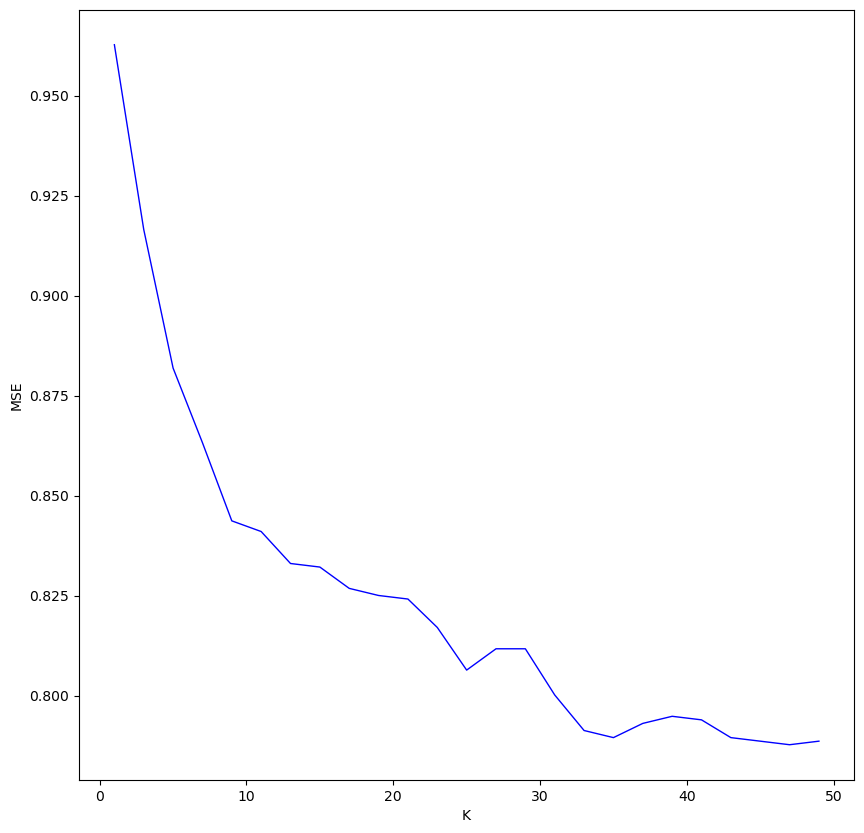

In [ ]:
mse = []

# to determine k-value  
for i in range(1, 50, 2):
  # Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors = i)

  #Train the model using the training sets
  knn.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
    
  #Predict the response for test dataset
  y_pred_knn = knn.predict(X_test_preprocessed_median)

  y_pred_knn = y_pred_knn.reshape(1126,1)

  mean = np.mean(y_pred_knn == y_test)

  mse.append(mean)

plt.figure(figsize=(10, 10))
plt.plot(range(1, 50, 2), mse, color='blue', linewidth=1)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

As the best K value above is 1, it may reduce the effect of noise on the classification, but makes the boundaries between each classification becomes more blurred.

Hence, we needs to look for the optimal K value. By finding the optimal K value, we will be calculating the accuracy score of every K value in Training Dataset and Testing Dataset

Result below shows the Accuracy for Training and Testing with k=1 until k-31

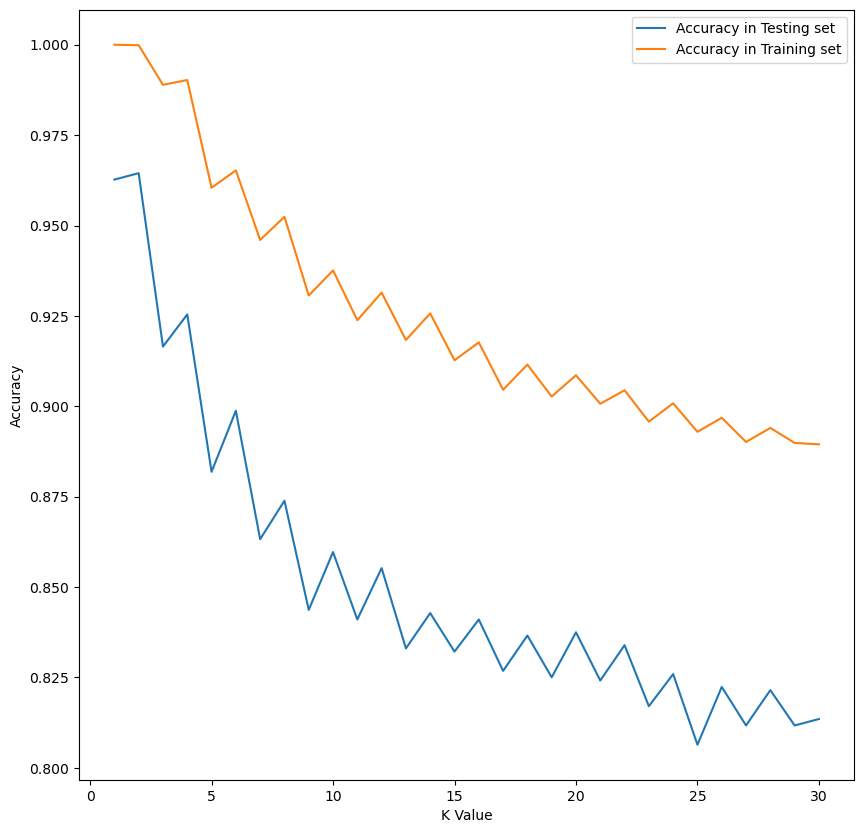

In [ ]:
neighbors = np.arange(1, 31) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train_preprocessed_median, y_train_for_median.values.ravel()) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train_preprocessed_median, y_train_for_median.values.ravel()) 
    test_accuracy[i] = knn.score(X_test_preprocessed_median, y_test) 

plt.figure(figsize=(10, 10))
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Accuracy in Testing set') 
plt.plot(neighbors, train_accuracy, label = 'Accuracy in Training set') 

plt.legend() 
plt.xlabel('K Value') 
plt.ylabel('Accuracy') 
plt.show()

As we can see below, as the Training Instances increasing, the Cross Validation Score increases as well. However, the Training Instances and Cross Validation Score did not have the sign of converging together. This results able to indicate that the model can insert more training exmaples in order to generalize more effectively.

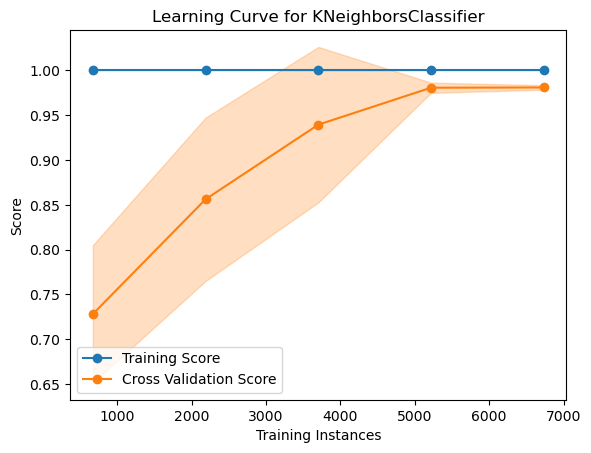

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
knnt = tuned_classifiers["KNearestNeighbour"]
knnt_visualizer = LearningCurve(knnt, cv=10, scoring ='accuracy', n_jobs = -1)
knnt_visualizer.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
knnt_visualizer.show()

The Performance Metrics used to evaluate the model with the optimal K Value (K=3) are Accuracy, Precision, Recal and F1-Score

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       941
           1       0.92      0.91      0.91       185

    accuracy                           0.97      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126

Accuracy for training: 1.0
Accuracy for testing : 0.9715808170515098

Confusion Matrix: 


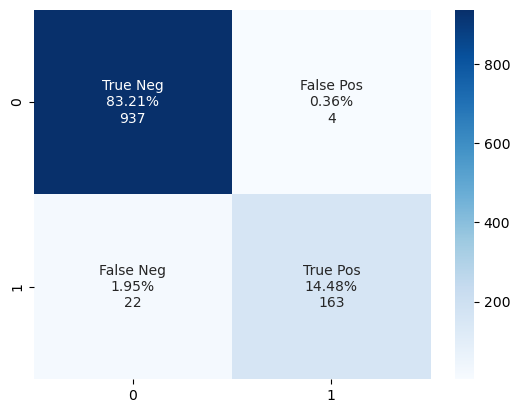

In [ ]:
# Tuned K Nearest Neighbour
print(knnt)
knnt.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
knnt_pred = knnt.predict(X_test_preprocessed_median)

#Confusion Matrix
knnt_cf_matrix = confusion_matrix(y_test,svct_pred)
names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in knnt_cf_matrix.flatten()/np.sum(knnt_cf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in knnt_cf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print('Classification Report: \n')
print(classification_report(y_test, knnt_pred))
print("Accuracy for training: {}".format(knnt.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing : {}".format(knnt.score(X_test_preprocessed_median, y_test)))
print('\nConfusion Matrix: ')
sns.heatmap(knnt_cf_matrix, annot=labels, fmt='', cmap='Blues');

With a total of 1126 number of predictions made by the classifier, the results are as below:



*   True Positives (TP): 14.48% of the customer predicted will churn for E-commerce Experience
*   True Negatives (TN): 83.21% of the customers predicted will continue support the E-commerce Experience
*   False Positives (FP): 0.36% of the customers predicted to churn for E-commerce, eventually they do not. (Also known as a "Type I error.")
*   False Negatives (FN): 1.95% of the Users predicted will continue E-commercing but they have churn for the experience. (Also known as a "Type II error.")




### ROC Plot

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. 

It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. 

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

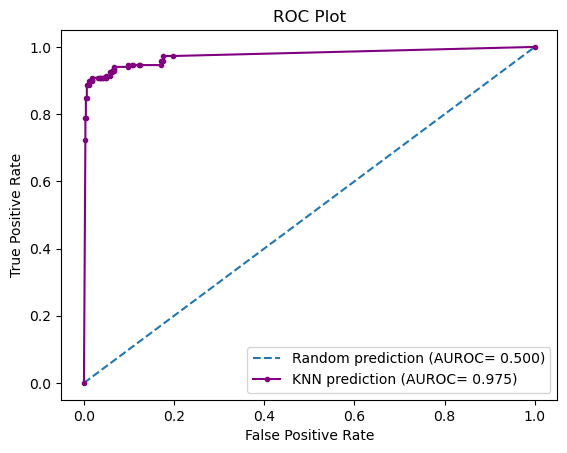

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model_tuned = knnt
model = CalibratedClassifierCV(model_tuned)
model.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
random_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test_preprocessed_median)
model_probs = model_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
#Calculate Area under ROC Curve
random_auc = roc_auc_score(y_test, random_probs)
model_auc = roc_auc_score(y_test, model_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

import matplotlib.pyplot as plt
plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='KNN prediction (AUROC= %0.3f)' %model_auc, color= 'purple')

plt.title('ROC Plot')
#Axis Lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()
#Show plot
plt.show()

It is evident from the plot that the AUC for the KNN ROC curve with the score of 0.975. Therefore, we can say that K-Nearest Neighbors did quite a good job of classifying the positive class in the dataset.

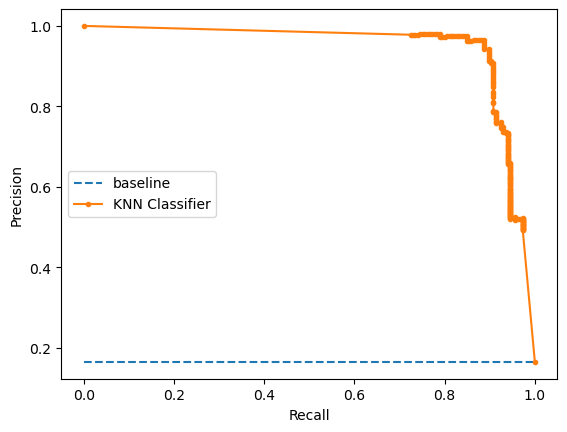

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
y_hat = knnt.predict(X_test_preprocessed_median)
model_precision, model_recall, _ = precision_recall_curve(y_test, model_probs)
model_f1 = f1_score(y_test, y_hat)
model_auc = auc(model_recall, model_precision)
no_skill = 185/(941+185)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label= 'baseline')
plt.plot(model_recall, model_precision, marker='.', label='KNN Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
#Show the legend
plt.legend()
#Show plot
plt.show()

As the result shown above, when our precision score is 1.0 which indicates no false positive, our recall will be very low because we still have many false negatives. This results remain after the Recall score is more than 0.9, the Precision Score start decreasing rapidly.


# Training Accuracy Comparison Based on All Models

In [ ]:
classifier_for_compare = tuned_classifiers
# rfct

classifier_list = [] 
for classifier in classifier_for_compare.keys():
    temp = {}
    temp["Classifier"] = classifier
    temp["Training Accuracy"] = classifier_for_compare[classifier].score(X_train_preprocessed_median, y_train_for_median)
    temp["Testing Accuracy"] = classifier_for_compare[classifier].score(X_test_preprocessed_median, y_test)
    classifier_list.append(temp)

rfc_compare = {'Classifier': 'RandomForestClassifer', 
               'Training Accuracy': rfct.score(X_train_preprocessed_rfc, y_train_for_rfc),
               'Testing Accuracy': rfct.score(X_test_preprocessed_rfc, y_test_for_rfc)}

classifier_list.append(rfc_compare)
class_df = pd.DataFrame.from_dict(classifier_list, orient='columns')


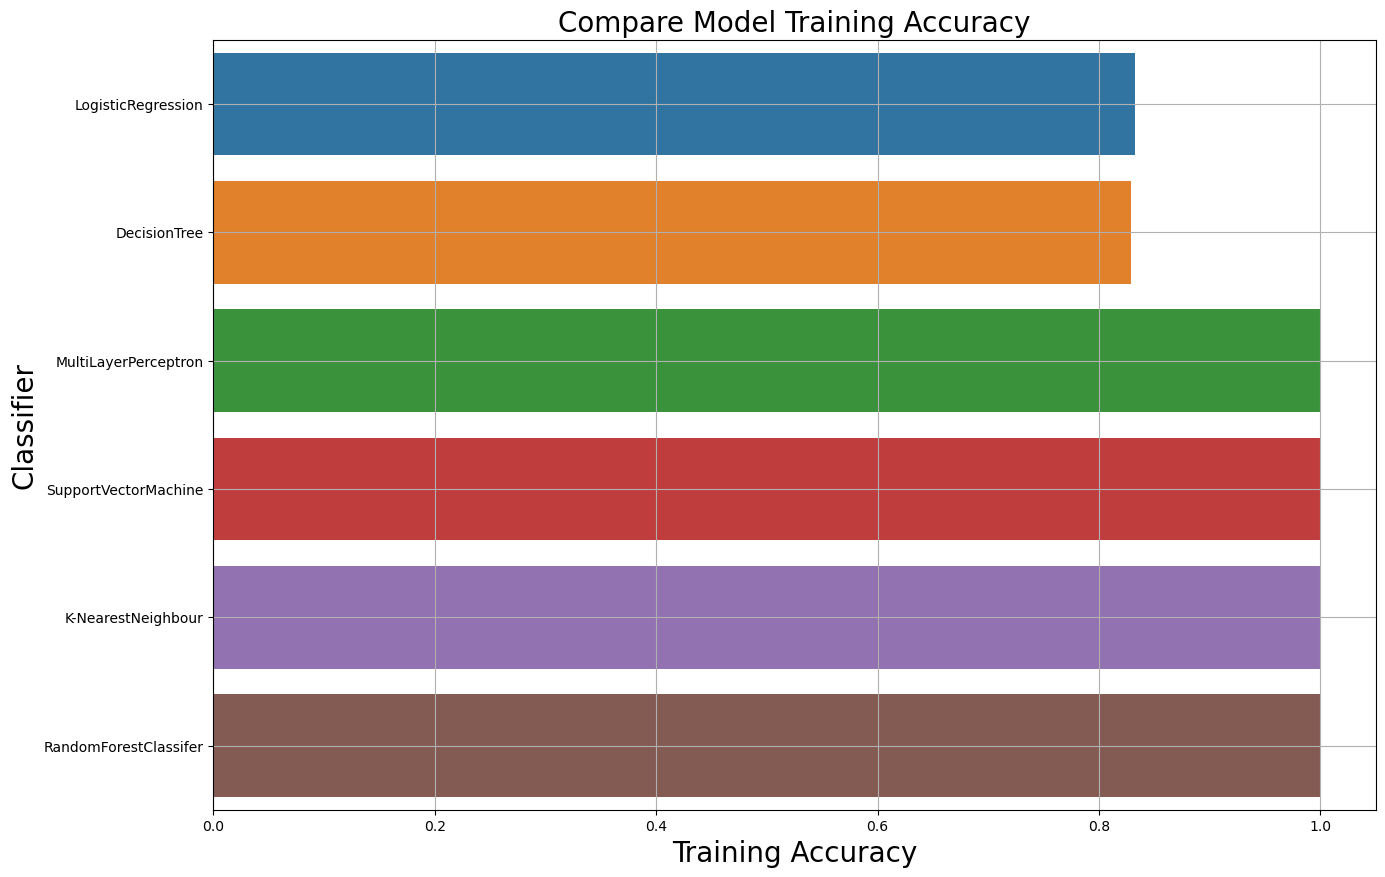

In [ ]:
plt.subplots(figsize= (15,10))
sns.barplot(data = class_df, x = 'Training Accuracy', y = 'Classifier', orient = 'h')
plt.title("Compare Model Training Accuracy", size = 20)
plt.xlabel(xlabel='Training Accuracy',size = 20)
plt.ylabel(ylabel='Classifier' ,size = 20)
plt.grid()

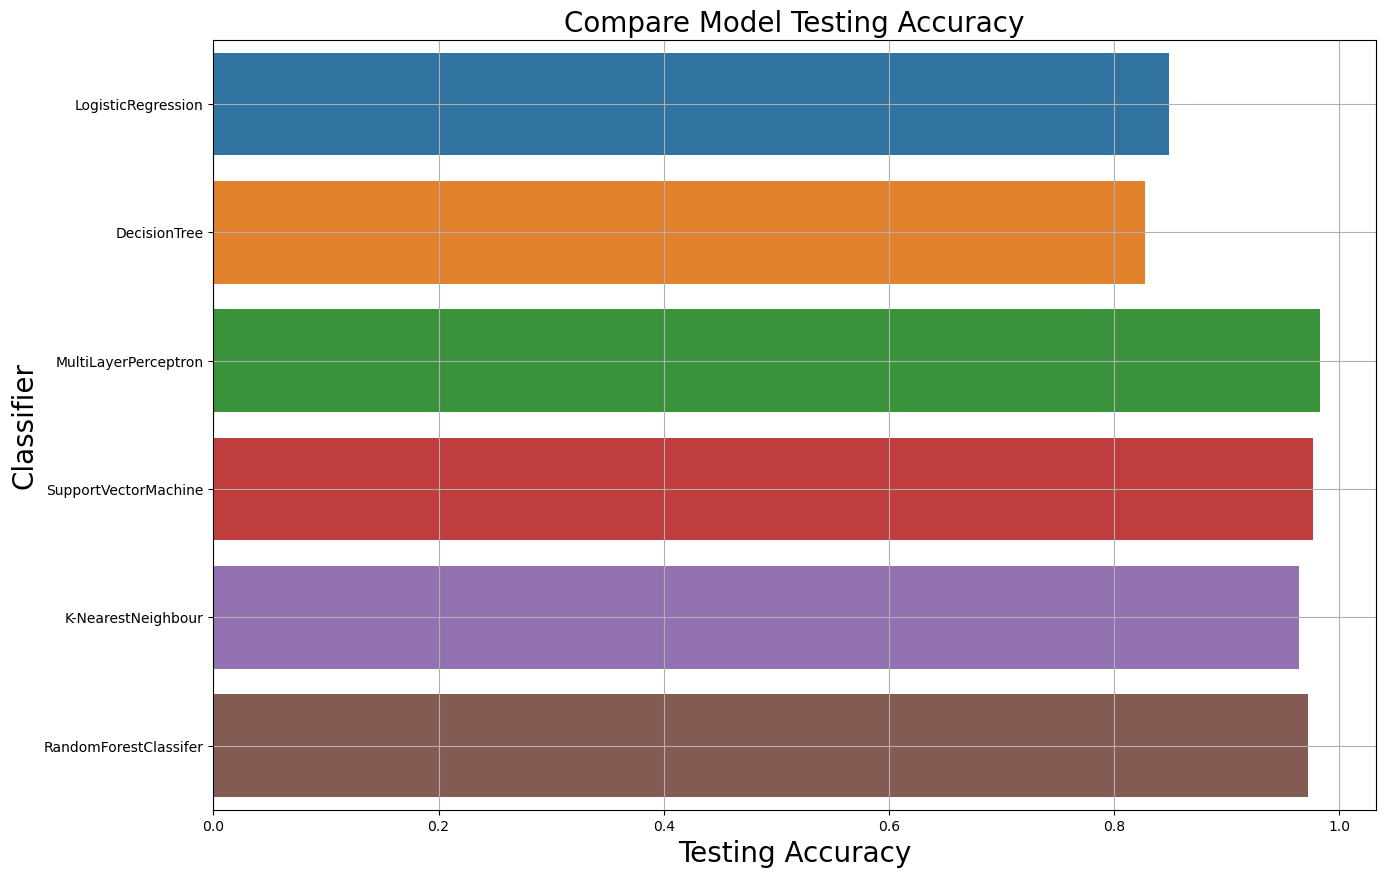

In [ ]:
plt.subplots(figsize= (15,10))
sns.barplot(data = class_df, x = 'Testing Accuracy', y = 'Classifier', orient = 'h')
plt.title("Compare Model Testing Accuracy", size = 20)
plt.xlabel(xlabel='Testing Accuracy',size = 20)
plt.ylabel(ylabel='Classifier' ,size = 20)
plt.grid()


# Ensemble Method

In [ ]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('mlp', mlpt), ('rfc', rfct), ('svm', svct)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')



In [ ]:
ensemble.fit(X_train_preprocessed_median, y_train_for_median.values.ravel())
pred_ensemble = ensemble.predict(X_test_preprocessed_median)





              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.98      0.91      0.95       185

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126

Accuracy for training: 1.0
Accuracy for testing: 0.9831261101243339




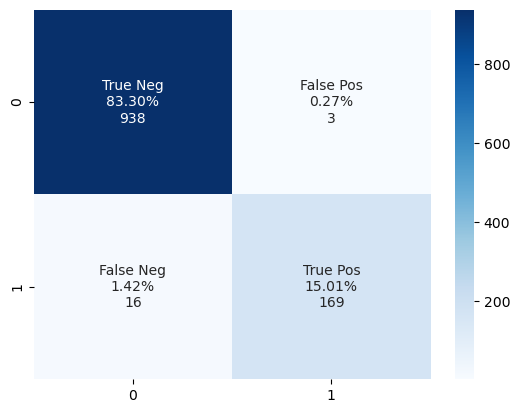

In [ ]:
print(classification_report(y_test, pred_ensemble))
ensemble_cf = confusion_matrix(y_test, pred_ensemble)
names = ['True Neg', 'False Pos','False Neg','True Pos']
percentages = ['{0:.2%}'.format(value) for value in ensemble_cf.flatten()/np.sum(ensemble_cf)]
counts = ['{0:0.0f}'.format(value) for value in ensemble_cf.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)
print("Accuracy for training: {}".format(ensemble.score(X_train_preprocessed_median, y_train_for_median)))
print("Accuracy for testing: {}\n\n".format(ensemble.score(X_test_preprocessed_median, y_test)))
sns.heatmap(ensemble_cf, annot=labels, fmt='', cmap='Blues');

# ROC Curve

In [ ]:

model_probs_list = []
def plot_all_model_roc_curve(tuned_classifiers, imputed_median_set, test_set):
        for classifier in tuned_classifiers.keys():
            model = tuned_classifiers[classifier]
            model_tuned = CalibratedClassifierCV(model)
            model_tuned.fit(imputed_median_set[0], imputed_median_set[1].values.ravel())
            random_probs = [0 for _ in range(len(test_set[1]))]
            model_probs = model_tuned.predict_proba(test_set[0])
            model_probs = model_probs[:, 1]
            model_probs_list.append(model_probs)
            random_auc = roc_auc_score(test_set[1], random_probs)
            model_auc = roc_auc_score(test_set[1], model_probs)
            print('Random (chance) Prediction: AUROC = %.3f' % (random_auc))
            print( classifier + ': AUROC = %.3f' %(model_auc))
            random_fpr, random_tpr, _ = roc_curve(test_set[1], random_probs)
            model_fpr, model_tpr, _ = roc_curve(test_set[1], model_probs)
            plt.plot(model_fpr, model_tpr, marker='_', label='RFC prediction for ' + classifier + '(AUROC= %0.3f)' %model_auc)
            plt.title('ROC Plot For Classifier with best param')

In [ ]:
def plot_rfc_roc_curve(rfct, imputed_median_set, test_set):
    model = rfct
    model_tuned = CalibratedClassifierCV(model)
    model_tuned.fit(imputed_median_set[0], imputed_median_set[1].values.ravel())
    random_probs = [0 for _ in range(len(test_set[1]))]
    model_probs = model_tuned.predict_proba(test_set[0])
    model_probs = model_probs[:, 1]
    model_probs_list.append(model_probs)
    random_auc = roc_auc_score(test_set[1], random_probs)
    model_auc = roc_auc_score(test_set[1], model_probs)
    print('Random (chance) Prediction: AUROC = %.3f' % (random_auc))
    print('Tuned Random Forest Classifier : AUROC = %.3f' %(model_auc))
    random_fpr, random_tpr, _ = roc_curve(test_set[1], random_probs)
    model_fpr, model_tpr, _ = roc_curve(test_set[1], model_probs)
    plt.plot(model_fpr, model_tpr, marker='_', label='RFC prediction for Random Forest Classifier(AUROC= %0.3f)' %model_auc)

Random (chance) Prediction: AUROC = 0.500
LogisticRegression: AUROC = 0.896
Random (chance) Prediction: AUROC = 0.500
DecisionTree: AUROC = 0.877
Random (chance) Prediction: AUROC = 0.500
MultiLayerPerceptron: AUROC = 0.979
Random (chance) Prediction: AUROC = 0.500
SupportVectorMachine: AUROC = 0.982
Random (chance) Prediction: AUROC = 0.500
K-NearestNeighbour: AUROC = 0.954
Random (chance) Prediction: AUROC = 0.500
Tuned Random Forest Classifier : AUROC = 0.983


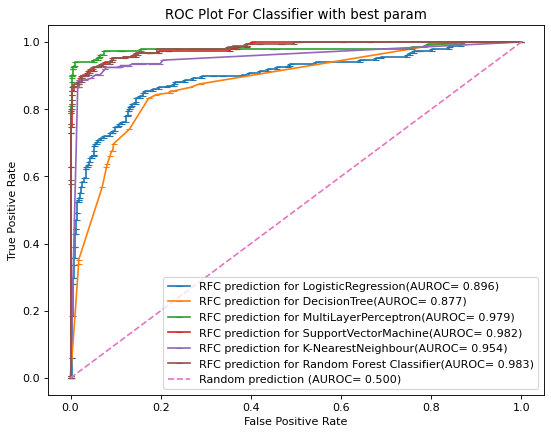

In [ ]:
figure(figsize=(8, 6), dpi=80)
plot_all_model_roc_curve(tuned_classifiers, [X_train_preprocessed_median, y_train_for_median], [X_test_preprocessed_median,y_test])
plot_rfc_roc_curve(rfct,[X_train_preprocessed_median, y_train_for_median], [X_test_preprocessed_median,y_test])
#Axis Lables
plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()
#Show plot
plt.show()

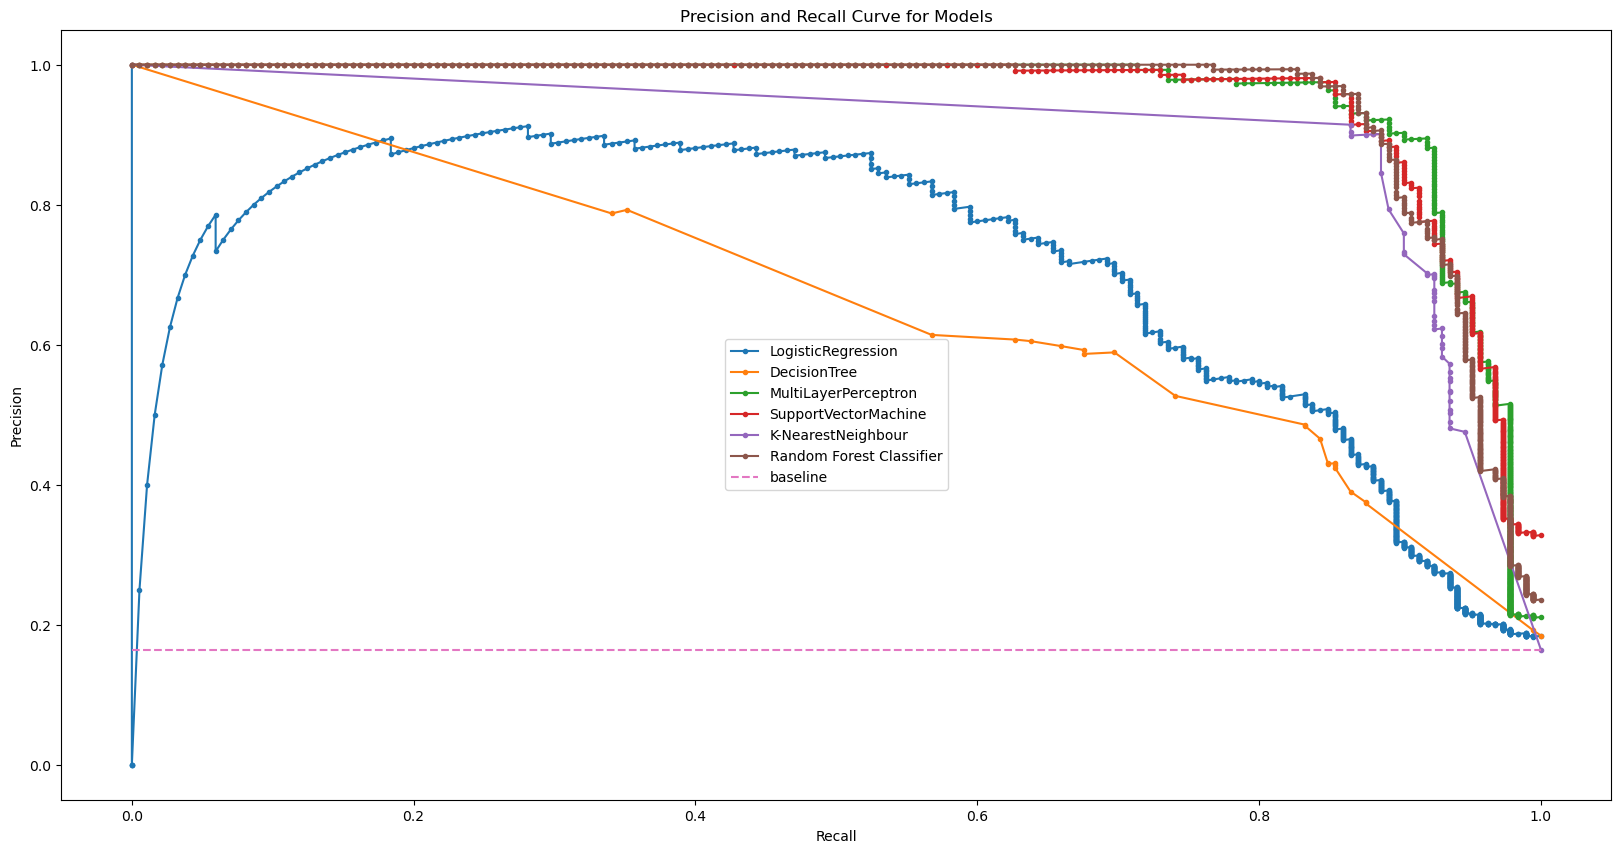

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
plt.subplots(figsize= (20,10))
def plot_models_precision_recall_curve(tuned_classifiers, imputed_median_set, test_set):
    i = 0
    for classifier in tuned_classifiers.keys():
        y_hat = tuned_classifiers[classifier].predict(X_test_preprocessed_median)
        model_precision, model_recall, _ = precision_recall_curve(y_test, model_probs_list[i])
        model_f1 = f1_score(y_test, y_hat)
        model_auc = auc(model_recall, model_precision)

        plt.plot(model_recall, model_precision, marker='.', label=classifier)
        i+=1
plot_models_precision_recall_curve(tuned_classifiers, [X_train_preprocessed_median, y_train_for_median], [X_test_preprocessed_median,y_test])
y_hat = rfct.predict(X_test_preprocessed_rfc)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
rfc_f1 = f1_score(y_test, y_hat)
rfc_auc = auc(rfc_recall, rfc_precision)
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest Classifier')
no_skill = 185/(941+185)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label= 'baseline')
plt.title('Precision and Recall Curve for Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
#Show the legend
plt.legend()

#Show plot
plt.show()

# Save Model

In [ ]:
# import pickle

# for classifier in tuned_classifiers.keys():
#     print(tuned_classifiers[classifier])
#     Pkl_Filename = classifier + "_Model.pkl"
#     with open(Pkl_Filename, 'wb') as file:  
#         pickle.dump(tuned_classifiers[classifier], file)
        
# rfc_file_name = "RandomForestClassifier.pkl"

# with open(rfc_file_name, 'wb') as file:  
#         pickle.dump(rfct, file)
        
# ensemble_file_name = "ensemble.pkl"

# with open(ensemble_file_name, 'wb') as file:  
#         pickle.dump(ensemble, file)



LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_leaf_nodes=11,
                       random_state=42)
MLPClassifier(activation='tanh', alpha=0.05, max_iter=1000, random_state=42)
SVC(C=100, gamma=0.1, probability=True, random_state=42)
KNeighborsClassifier(n_neighbors=2)


In [ ]:
# load_classifier = {}

# for classifier in tuned_classifiers.keys():
#     Pkl_Filename = classifier + "_Model.pkl"
#     with open(Pkl_Filename, 'rb') as file:  
#         Pickled_Model = pickle.load(file)
#         load_classifier[classifier] = Pickled_Model
#         print(classifier, ":",Pickled_Model.score(X_test_preprocessed_median, y_test))
        
# rfc_file_name = "RandomForestClassifier.pkl"

# with open(rfc_file_name, 'rb') as file:  
#         Pickled_Model = pickle.load(file)
#         print("Random Forest Classifier: ",Pickled_Model.score(X_test_preprocessed_rfc, y_test))
# load_classifier['RandomForest'] = Pickled_Model  

# ensemble_file_name = "ensemble.pkl"

# with open(ensemble_file_name, 'rb') as file:  
#         Pickled_Model = pickle.load(file)
#         print("Ensemble Classifier: ", Pickled_Model.score(X_test_preprocessed_median, y_test))
        
        
# load_classifier['Ensemble'] =  Pickled_Model

# print(load_classifier)

LogisticRegression : 0.8490230905861457
DecisionTree : 0.827708703374778
MultiLayerPerceptron : 0.9831261101243339
SupportVectorMachine : 0.9769094138543517
K-NearestNeighbour : 0.9644760213143873
Random Forest Classifier:  0.9724689165186501
Ensemble Classifier:  0.9831261101243339
{'LogisticRegression': LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear'), 'DecisionTree': DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_leaf_nodes=11,
                       random_state=42), 'MultiLayerPerceptron': MLPClassifier(activation='tanh', alpha=0.05, max_iter=1000, random_state=42), 'SupportVectorMachine': SVC(C=100, gamma=0.1, probability=True, random_state=42), 'K-NearestNeighbour': KNeighborsClassifier(n_neighbors=2), 'RandomForest': RandomForestClassifier(max_features='log2', n_estimators=1000, random_state=42), 'Ensemble': VotingClassifier(estimators=[('mlp',
                              MLPClassifier(activation='tanh', alpha=0.05,
               